#Classes:

##### *Visualisation Class*

In [ ]:
class Visualizations_Class:
    def plot_heatmap(self, x):
        colormap = plt.cm.viridis
        plt.figure(figsize=(30,30))
        sns.heatmap(x.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)


    def plot_Histogram(self, feature_name, dataFrameName):
      sns.set(style='ticks', palette='bright', font_scale=1)
      fig, ax=plt.subplots(figsize=(2,2))
      plt.hist(dataFrameName[feature_name], bins=15, color='b')
      plt.xlabel(feature_name)
      plt.ylabel('count')
      plt.show()

    def plot_scatteredplot(self, feature_name1,feature_name2, dataFrameName):
      fig, ax=plt.subplots(figsize=(2,2))
      plt.scatter(dataFrameName[feature_name1],dataFrameName[feature_name2],s=10,c='g')
      plt.xlabel(feature_name1)
      plt.ylabel(feature_name2)
      plt.show()

##### *My Functions Class*

In [ ]:
class My_Functions:
    
    def redefine_target_feature(self, x):
        print('\033[1m' + '\n Redifining the Target Feature to :\n 0 - Normal, 1 - Prediabetic, 2 - diabetic: \n' + '\033[0m')
        # 0 - Normal, 1 - Prediabetic, 2 - diabetic
        df_diabetes_final = x
        df_diabetes_final.loc[df_diabetes_final['GlycoHemoglobin'] < 5.7, 'Diabetes'] = 0
        df_diabetes_final.loc[(df_diabetes_final['GlycoHemoglobin'] >= 5.7) & (df_diabetes_final['GlycoHemoglobin'] <= 6.4), 'Diabetes'] = 1
        df_diabetes_final.loc[df_diabetes_final['GlycoHemoglobin'] >= 6.5, 'Diabetes'] = 2

        return df_diabetes_final

    def check_for_nulls_per(self, x):
        table = {'\033[1m' + '\n Null Values By Count \n' + '\033[0m' :  x.isna().sum().sort_values(ascending=True),
                 '\033[1m' + '\n Null Values By Percentage \n' + '\033[0m': round((x.isnull().sum() * 100/ len(x)),2).sort_values(ascending=True),
            }
        table_df = pd.DataFrame(table)
        with pd.option_context('display.max_rows', None,):
            print(table_df)
        
    
    def remove_outliers_by_target(self):
        print('\033[1m' + '\n Boxplot: \n' + '\033[0m')
        sns.boxplot(df_main['GlycoHemoglobin'])
        plt.show()

        values = (np.where(df_main['GlycoHemoglobin']>15))
        values_1 = np.ravel(values)
        print("Outliers are :", values_1)
        df_main.drop(values_1, inplace=True)
        

    def treat_by_lambda(self, x, column_names):
        for col in column_names:
            x[col] = x[col].apply(lambda i: i if i > 0 else 0)

        return x

    def treat_by_mode(self, x, column_names):
        for col in column_names:
            x[col] = x[col].fillna(x[col].mode()[0])

        return x

    def treat_by_median(self, x, column_names):
        for col in column_names:
            x[col] = x[col].fillna(x[col].median())

        return x

    def treat_by_one(self, x, column_names):
        for col in column_names:
            x[col] = x[col].fillna(value = 1)

        return x

    def treat_by_mean(self, x, column_names):
        for col in column_names:
            x[col] = x[col].fillna(x[col].mean())

        return x

    def treat_by_ffil(self, x, column_names):
        for col in column_names:
            x[col] = x[col].fillna(method='ffill')

        return x
    
    def corr_matrix_abs(self, x):
        corr_matrix = x.corr().abs() # Create correlation matrix
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)) # Select upper triangle of correlation matrix
        to_drop = [column for column in upper.columns if any(upper[column] > 0.80)] # Find features with correlation greater than 0.80
        x.drop(to_drop, axis=1, inplace=True) # Drop  
        return x

    def select_best_40_features(self, x):
        corr_matrix = x.corr() # Compute the correlation matrix
        pos_corr_cols = corr_matrix.nlargest(20, "LBXGH")["LBXGH"].index.tolist() # Select the top 20 most positively correlated columns
        neg_corr_cols = corr_matrix.nsmallest(20, "LBXGH")["LBXGH"].index.tolist() # Select the top 20 most negatively correlated columns
        selected_cols = pos_corr_cols + neg_corr_cols # Combine the lists of positively and negatively correlated columns
        selected_cols.append('SEQN')
        x = x[selected_cols]
        return x

    def check_correlation_matrix(self, x):
        corr_matrix = x.corr()
        print(corr_matrix["LBXGH"].sort_values(ascending=False))
    
    def save_file_csv(self, x, file_name):
        # folder_path = '/content/drive/Shared drives/Data Mining Project/Data Mining Project/Cleaned Data/'
        #folder_path = '/content/drive/MyDrive/Data Mining Project/Cleaned Data/'
        # file_name = folder_path + file_name
        # file_path = os.path.join(folder_path, file_name)
        x.to_csv(file_name, index=False, encoding="utf-8")

    def remove_40_perc_null_features(self, x):
        null_percentage = (x.isnull().sum() / len(x)) * 100
        null_columns = list(null_percentage[null_percentage >= 40].index)
        x = x.drop(null_columns, axis=1)
        print('\033[1m' + '\n Dropping ',len(null_columns),'features \n' + '\033[0m')
        return x

    def standardscaling(self, X_train, X_test):
      scaler = StandardScaler()
      scaler.fit(X_train)

      # transform the training and testing data
      X_train = scaler.transform(X_train)
      X_test = scaler.transform(X_test)
      return X_train, X_test

##### *Feature importance Class*

In [ ]:
class Feature_Importance:

    def __init__(self, n=20):
        self.n = n

    

    def feature_imp(self, model_name, model, X_train):
        
        if model_name == 'CatBoostClassifier':
            feat_imp = model.get_feature_importance()
            feat_imp_sort = np.argsort(feat_imp)[::-1]
            feature_names = X_train.columns[feat_imp_sort]
            feature_scores = feat_imp[feat_imp_sort]
        elif model_name == 'XGBClassifier':
            feat_imp = model.feature_importances_
            feat_imp_sort = np.argsort(feat_imp)[::-1]
            feature_names = X_train.columns[feat_imp_sort]
            feature_scores = feat_imp[feat_imp_sort]
        elif model_name == 'RandomForestClassifier' or model_name == 'ExtraTreesClassifier':
            feat_imp = model.feature_importances_
            feat_imp_sort = np.argsort(feat_imp)[::-1]
            feature_names = X_train.columns[feat_imp_sort]
            feature_scores = feat_imp[feat_imp_sort]
        elif model_name == 'LogisticRegression':
            feat_imp_sort = np.argsort(np.abs(model.coef_))[0][::-1]
            feature_names = X_train.columns[feat_imp_sort]
            feature_scores = np.abs(model.coef_[0][feat_imp_sort])
        elif model_name == 'DecisionTreeClassifier_RFE':
            feat_imp_sort = np.argsort(model.estimator_.feature_importances_)[::-1]
            feature_names = X_train.columns[feat_imp_sort]
            feature_scores = model.estimator_.feature_importances_[feat_imp_sort]
        elif model_name == 'chi-squared':
            select_k_best = SelectKBest(chi2, k='all')
            select_k_best.fit(X_train, y_train)
            X_axis = X_train.columns
            Y_axis = select_k_best.scores_
            feat_imp_sort = np.argsort(Y_axis)[::-1]
            feature_names = X_axis[feat_imp_sort]
            feature_scores = Y_axis[feat_imp_sort]
        elif model_name == 'anova':
            select_k_best = SelectKBest(f_classif, k=20)
            select_k_best.fit(X_train, y_train)
            X_axis = X_train.columns
            Y_axis = select_k_best.scores_
            feat_imp_sort = np.argsort(Y_axis)[::-1]
            feature_names = X_axis[feat_imp_sort]
            feature_scores = Y_axis[feat_imp_sort]
        else:
            raise ValueError('Invalid method specified.')
            
        print('\033[1m' + '\n The most important 20 features for ' + model_name + ': \n' + '\033[0m')
        names = []
        for i in range(20):
            print(i+1, '-', feature_names[i], ': ', feature_scores[i])
            names.append(feature_names[i])

        print('\033[1m')
        print(f"Plotting the Feature Importance Graph for the {model_name} :")
        print('\033[0m')
        figure(figsize=(15, 10), dpi=80)
        plt.barh(feature_names, feature_scores, color='teal')
        plt.title("Feature Importance - Top 20 Features", fontweight='bold')
        plt.grid(False)
        plt.show()
        return names




        
        
        
    def train_model(self, model_name, X_train, y_train):
        model = None # assign None to model variable
        if model_name == 'CatBoostClassifier':
            model = CatBoostClassifier(verbose=False)
        elif model_name == 'XGBClassifier':
            model = XGBClassifier()
        elif model_name == 'RandomForestClassifier':
            model = RandomForestClassifier()
        elif model_name == 'ExtraTreesClassifier':
            model = ExtraTreesClassifier()
        elif model_name == 'LogisticRegression':
            model = LogisticRegression(max_iter=1000)
        elif model_name == 'DecisionTreeClassifier_RFE':
          dt = DecisionTreeClassifier()
          rfe = RFE(estimator=dt, n_features_to_select=self.n, step=1)
          model = rfe.fit(X_train, y_train)
        elif model_name == 'chi-squared':
          select_k_best = SelectKBest(chi2, k='all')
          select_k_best.fit(X_train, y_train)
          X_train = select_k_best.transform(X_train)
        elif model_name == 'anova':
          select_k_best_anova = SelectKBest(f_classif, k=20)
          select_k_best_anova.fit(X_train, y_train)
          X_train = select_k_best_anova.transform(X_train)
          
        
          
        else:
          raise ValueError("Invalid model name.")

        if model is not None:
          model.fit(X_train, y_train)

        return model

##### *Data Modeling Class*

In [ ]:
class data_modeling:
  def modeling_without_tuning(self, model_name, X_train, y_train, X_test, y_test):
    if model_name == 'DecisionTreeClassifier':
      model = DecisionTreeClassifier()

    elif model_name == 'RandomForestClassifier':
      model = RandomForestClassifier()

    elif model_name == 'LogisticRegression':
      model = LogisticRegression()

    elif model_name == 'CatBoostClassifier':
      model = CatBoostClassifier(verbose=False)

    elif model_name == 'SVM':
      model = svm.SVC(kernel='linear')
    elif model_name == 'NaiveBayes':
      model = GaussianNB()  
    
    else:
      print("No model defined")
      return
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = (np.sqrt(mean_squared_error(y_test, pred)))
    r2 = r2_score(y_test, pred)
    f1 = f1_score(y_test, pred, average='micro')
    acc_score = accuracy_score(y_test, pred) * 100

    print('\033[1m')
    print(f"Testing Performance Metrics for the {model_name} :")
    print('\033[0m')
    print("                            R2: {:.2f}".format(r2))
    print("      Mean Squared Error (MSE): {:.2f}".format(mse))
    print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
    print("                      F1 Score: {:.2f}".format(f1))
    print("                      Accuracy: {:.2f}%".format(acc_score))
    self.plot(y_test, pred, model_name)

  def plot(self, y_test, pred, model_name):
    Actual_Pred = pd.DataFrame({'Actual': y_test['Diabetes'], 'Predicted': pred.flatten()})
    Actual_Pred = Actual_Pred.head(25)
    round(Actual_Pred,2)
    Result = Actual_Pred[['Actual','Predicted']]
    Result = Result.reset_index(drop=True)
    Result.plot(marker='o',figsize=(20,7))
    plt.title('Actual vs Predicted', fontsize=14)
    plt.ylabel('Diabetes', fontsize=14)
    plt.grid(False)
    plt.show()

#### Hyper Parameter tuning Functions

In [ ]:
def false_alarm_rate(y_true, y_pred):
    """
    This function will return False Alarm Rate for given true and predicted values.
    False Alarm Rate is average of False Negetive Rate and False Positive Rate
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    FPR = fp / (fp + tn)  # False positive rate
    FNR = fn / (fn + tp)  # False negetive rate
    return (FPR+FNR)/2  # False alarm rate



def hyperparam_tuning(clf, parameters, x, y, method='gridsearch', cv=None):
    """
    Utility function for Tuning hyperparameters
    """
    # initialization
    scoring = {'auc':'roc_auc',
               'f1':'f1',
               'FAR':make_scorer(false_alarm_rate, greater_is_better=False)}  # using custom scoring function FAR.
                
    # param tuning
    if method=='gridsearch':
        # As we are using multi scoring, So we need to point refit to scoring function with which we want to evaluate score
        tuning_clf = GridSearchCV(clf, parameters, scoring=scoring, refit='auc',
                                  cv=cv, verbose=3, return_train_score=True)
        result = tuning_clf.fit(x, y)
    
    elif method=='randomsearch':
        tuning_clf = RandomizedSearchCV(clf, parameters, scoring=scoring, refit='auc',
                                        cv=cv, verbose=3, return_train_score=True)
        result = tuning_clf.fit(x, y)

    return result


def result_visualization(tuned_clf, parameters, param1=None, param2=None,param3 = None):
    """
    Utility function to plot the results obtained after hyper parameter tuning 
    """
    # getting train and test scores to plot
    train_score = tuned_clf.cv_results_['mean_train_auc']
    test_score = tuned_clf.cv_results_['mean_test_auc']

    # print results
    print("Best Score: {}".format(tuned_clf.best_score_))
    print("Best Parameters: {}".format(tuned_clf.best_params_))

    # Want to visualize score with 2 params, plot heatmap of the 3 variables
    if param2 is not None:
        # heatmap
        train_cmap=sns.light_palette("green")
        test_cmap=sns.light_palette("blue")
        
        # Figure and axis
        fig = plt.figure(figsize=(20,5))
        train_ax = fig.add_subplot(1,2,1)
        test_ax = fig.add_subplot(1,2,2)
        
        # train heatmap
        sns.heatmap(train_score.reshape(len(parameters[param1]), len(parameters[param2])),
                    cmap=train_cmap, annot=True, fmt='.4f', ax=train_ax,
                    xticklabels=parameters[param2], yticklabels=parameters[param1])
        
        # test heapmap
        sns.heatmap(test_score.reshape(len(parameters[param1]), len(parameters[param2])),
                    cmap=test_cmap, annot=True, fmt='.6f', ax=test_ax,
                    xticklabels=parameters[param2], yticklabels=parameters[param1])
        
        # axis labels and plot title
        train_ax.set_title("Train hyperparam heatmap")
        train_ax.set_xlabel(param2)
        train_ax.set_ylabel(param1)

        test_ax.set_title("Test hyperparam heatmap")
        test_ax.set_xlabel(param2)
        test_ax.set_ylabel(param1)
        plt.show()
    
    
        
    
    # Want to visualize score with one param, simply plot score and param
    else:
        plt.figure(figsize=(10,5))
        plt.plot(np.log10(parameters[param1]), train_score, label="train")
        plt.plot(np.log10(parameters[param1]), test_score, label="test")

        # Plot for train data
        for i, txt in enumerate(train_score):
            plt.annotate((parameters[param1][i], np.round(txt, 3)), (np.log10(parameters[param1])[i], train_score[i]))
        
        # Plot for test data
        for i, txt in enumerate(test_score):
            plt.annotate((parameters[param1][i], np.round(txt, 3)), (np.log10(parameters[param1])[i], test_score[i]))
        
        plt.xlabel(param1)
        plt.ylabel('performance')
        plt.grid()
        plt.legend()
        plt.show()


def evaluate_result(clf, x_train, y_train, x_test, y_test, model_name):
    """ 
    Utility function to get result on test data from best found classifier using hyper parameter tuning.
    Print the accuracy and False Alarm Rate for both train and test.
    Plot confusion matrix of train and test.
    """
    cmap=sns.light_palette("blue")
    labels= ['non-attack', 'attack']
    
    # Training te best model
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)  # prediction on train data
    y_test_pred = clf.predict(x_test)  # prediction on test data
    
    # auc curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
    
    # Scores of train dataset
    train_auc = auc(train_fpr, train_tpr)
    train_f1 = f1_score(y_train, y_train_pred)
    train_far = false_alarm_rate(y_train, y_train_pred)
    
    # Scores of test dataset
    test_auc = auc(test_fpr, test_tpr)
    test_f1 = f1_score(y_test, y_test_pred)
    test_far = false_alarm_rate(y_test, y_test_pred)
    
    # Printing the result as a table
    x = PrettyTable()
    x.field_names = ['Dataset', 'Model', 'AUC', 'F1-score', 'False Alarm Rate']
    x.add_row(['Train', model_name, train_auc, train_f1, train_far])
    x.add_row(['Test', model_name, test_auc, test_f1, test_far])
    print(x)

    # Plot AUC curve
    plt.figure()
    plt.plot(train_fpr, train_tpr, label=f"Train AUC: {train_auc}")
    plt.plot(test_fpr, test_tpr, label=f"Test AUC: {test_auc}")
    plt.grid()
    plt.legend()
    plt.show()

    # Confusion martix of train and test
    # Train confusion matrix
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(confusion_matrix(y_train, y_train_pred),
                annot=True, cmap=cmap, fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Train Confusion Matrix")

    # Test confusion matrix
    plt.subplot(1,2,2)
    sns.heatmap(confusion_matrix(y_test, y_test_pred),
                annot=True, cmap=cmap, fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Test Confusion Matrix")
    plt.show()
    
    # Returning scores of test data
    return clf, test_auc, test_f1, test_far

# Classes Object:

In [ ]:
func = My_Functions()
feature_imp = Feature_Importance()
viz = Visualizations_Class()
cls_model_obj = data_modeling()

# Library initialization



```
# Installing Required Packages
```



In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest ,  f_classif
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
from matplotlib.pyplot import figure
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import warnings
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
import numpy as np

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Dataset:

In [ ]:
df_main = pd.read_csv('/content/drive/NHANES_Categorical_Merged_2013_14.csv')

FileNotFoundError: ignored

# EDA:

In [ ]:
df_main.head

<bound method NDFrame.head of         SEQN  ACD011A  ACD011B  ACD011C  ACD040  ACD110  ALQ101  ALQ110  \
0      73557      1.0      NaN      NaN     NaN     NaN     1.0     NaN   
1      73557      1.0      NaN      NaN     NaN     NaN     1.0     NaN   
2      73558      1.0      NaN      NaN     NaN     NaN     1.0     NaN   
3      73558      1.0      NaN      NaN     NaN     NaN     1.0     NaN   
4      73558      1.0      NaN      NaN     NaN     NaN     1.0     NaN   
...      ...      ...      ...      ...     ...     ...     ...     ...   
19575  83727      NaN      NaN      NaN     3.0     NaN     1.0     NaN   
19576  83728      NaN      NaN      NaN     NaN     NaN     NaN     NaN   
19577  83729      1.0      NaN      NaN     NaN     NaN     NaN     NaN   
19578  83730      NaN      NaN      NaN     4.0     NaN     NaN     NaN   
19579  83731      NaN      NaN      NaN     NaN     5.0     NaN     NaN   

       ALQ120Q  ALQ120U  ...  DMDHREDU  DMDHRMAR  DMDHSEDU      WTINT

In [ ]:
func.check_for_nulls_per(df_main)

            \n Null Values By Count \n  \
ACD011A                                   6544   
ACD011B                                  19538   
ACD011C                                  19298   
ACD040                                   15704   
ACD110                                   18058   
AGQ030                                   16609   
AIALANGA                                  7531   
ALQ101                                    5543   
ALQ110                                   15206   
ALQ120Q                                   7857   
ALQ120U                                  11260   
ALQ130                                   11249   
ALQ141Q                                  11253   
ALQ141U                                  16876   
ALQ151                                    7867   
ALQ160                                   15731   
AUQ136                                    7320   
AUQ138                                    7320   
BMDAVSAD                                  4071   
BMDBMIC 

In [ ]:
df_main.describe()

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
count,19580.000000,13036.0,42.0,282.0,3876.000000,1522.000000,14037.000000,4374.000000,11723.000000,8320.000000,...,19142.000000,19450.000000,9986.000000,19580.000000,19580.000000,19580.000000,19580.000000,19362.000000,19382.000000,18218.000000
mean,78544.159704,1.0,8.0,9.0,3.042570,2.835742,1.333048,1.559442,4.655037,1.997476,...,3.443841,2.525758,3.583717,33975.859843,35032.541408,1.480899,111.048366,10.247237,9.896966,2.264044
std,2935.456571,0.0,0.0,0.0,1.572504,1.744897,0.627457,0.699882,40.108653,0.871953,...,1.260599,5.160021,1.284339,29465.235601,30183.463450,0.499648,4.219822,13.376386,13.135302,1.596804
min,73557.000000,1.0,8.0,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,3697.772098,3748.417657,1.000000,104.000000,1.000000,1.000000,0.000000
25%,75978.000000,1.0,8.0,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,3.000000,1.000000,3.000000,14404.169400,14886.177017,1.000000,107.000000,5.000000,4.000000,0.930000
50%,78503.000000,1.0,8.0,9.0,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000,...,4.000000,1.000000,4.000000,22593.937563,23431.848747,1.000000,111.000000,7.000000,7.000000,1.740000
75%,81063.000000,1.0,8.0,9.0,4.000000,5.000000,2.000000,2.000000,3.000000,3.000000,...,4.000000,3.000000,5.000000,40079.239311,41986.888028,2.000000,115.000000,14.000000,13.000000,3.560000
max,83731.000000,1.0,8.0,9.0,9.000000,5.000000,9.000000,9.000000,999.000000,3.000000,...,9.000000,99.000000,9.000000,167884.543709,171395.264901,2.000000,118.000000,99.000000,99.000000,5.000000


# Data Cleaning:

In [ ]:
df_main = df_main.dropna(subset=['SEQN'])

*Before Dropping:* 

In [ ]:
df_main.shape

(19580, 1824)

##### *Dropping features with 40% or more nulls*

In [ ]:
df_main = func.remove_40_perc_null_features(df_main)


 Dropping  1267 features 



*After Dropping:*

In [ ]:
df_main.shape

(19580, 557)

In [ ]:
df_main.head

<bound method NDFrame.head of         SEQN  ACD011A  ALQ101  BPQ020  BPQ056  BPQ059  BPQ080  BPQ070  \
0      73557      1.0     1.0     1.0     2.0     2.0     1.0     1.0   
1      73557      1.0     1.0     1.0     2.0     2.0     1.0     1.0   
2      73558      1.0     1.0     1.0     1.0     2.0     1.0     1.0   
3      73558      1.0     1.0     1.0     1.0     2.0     1.0     1.0   
4      73558      1.0     1.0     1.0     1.0     2.0     1.0     1.0   
...      ...      ...     ...     ...     ...     ...     ...     ...   
19575  83727      NaN     1.0     2.0     2.0     2.0     2.0     3.0   
19576  83728      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
19577  83729      1.0     NaN     2.0     2.0     2.0     2.0     1.0   
19578  83730      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
19579  83731      NaN     NaN     NaN     NaN     NaN     NaN     NaN   

       BPQ090D  CBD070  ...  DMDHRBR4  DMDHREDU  DMDHRMAR      WTINT2YR  \
0          1.0   3

In [ ]:
func.check_for_nulls_per(df_main)

            \n Null Values By Count \n  \
ACD011A                                   6544   
AIALANGA                                  7531   
ALQ101                                    5543   
AUQ136                                    7320   
AUQ138                                    7320   
BMDAVSAD                                  4071   
BMDSTATS                                     0   
BMXARMC                                   1252   
BMXARML                                   1254   
BMXBMI                                    1058   
BMXHT                                     1006   
BMXLEG                                    3585   
BMXSAD1                                   4071   
BMXSAD2                                   4071   
BMXWAIST                                  2132   
BMXWT                                      279   
BPAARM                                    2905   
BPACSZ                                    2871   
BPAEN1                                    2889   
BPAEN2  

##### *Selecting top 40 most Correlated features:*

In [ ]:
df_main = func.corr_matrix_abs(df_main)

In [ ]:
func.check_correlation_matrix(df_main)

LBXGH       1.000000
LBXSGL      0.776060
LBXSOSSI    0.327176
RIDAGEYR    0.291449
HUQ010      0.229003
              ...   
DIQ010     -0.522592
ACD011A          NaN
HSAQUEX          NaN
SDDSRVYR         NaN
RIDSTATR         NaN
Name: LBXGH, Length: 425, dtype: float64


In [ ]:
df_main = func.select_best_40_features(df_main)

In [ ]:
df_main.shape

(19580, 41)

*Dropping Duplicates:*

In [ ]:
df_main = df_main.drop_duplicates().reset_index(drop=True)

In [ ]:
print(df_main.columns)

Index(['LBXGH', 'LBXSGL', 'LBXSOSSI', 'RIDAGEYR', 'HUQ010', 'LBXSTR',
       'RXDCOUNT', 'HSD010', 'LBXSBU', 'URXUMA', 'BPACSZ', 'OHX03TC',
       'OHX14TC', 'OHX18TC', 'OHX13TC', 'OHX04TC', 'DMDHRAGE', 'OHX30TC',
       'OHX19TC', 'OHX15TC', 'DIQ010', 'DIQ050', 'MCQ365A', 'MCQ365D',
       'RXDUSE', 'MCQ365B', 'MCQ365C', 'LBXSCLSI', 'LBXSAL', 'MCQ080',
       'BPQ020', 'LBDHDD', 'BPQ090D', 'LBXSNASI', 'MCQ370C', 'WHQ030',
       'BMXLEG', 'RXQ510', 'LBXSIR', 'PAAQUEX', 'SEQN'],
      dtype='object')


In [ ]:
df_main.shape

(9813, 41)

##### *Feature Renaming:*

In [ ]:
df_main = df_main.rename(columns = {'LBXGH' : 'GlycoHemoglobin',
                                    'LBXSGL': 'Glucose_lab',
                                    'LBXSOSSI': 'Osmolality_lab',
                                    'RIDAGEYR' : 'Age_while_screening',
                                    'LBXSTR': 'Triglycerides_lab',
                                    'LBXSBU':'Blood_urea_nitrogen_lab',
                                    'URXUMA':'Albumin_urine_lab',
                                    'LBXSCLSI' : 'Chloride_lab',
                                    'LBXSAL':'Albumin_lab',
                                    'LBDHDD':'Direct_HDL_Cholesterol_lab',
                                    'LBXSNASI' :'Sodium_lab',
                                    'LBXSIR': 'Iron_lab',
                                    'DIQ010': 'SP_diagnosed_diabetes',
                                    'DIQ050': 'Taking_insulin',
                                    'HUQ010': 'Health_conditions_by_hospital',
                                    'RXDUSE': 'Have_taken_any_med_in_30days',
                                    'RXDCOUNT': 'Total_prescribed_meds',
                                    'HSD010': 'Current_health_status',
                                    'MCQ365D': 'Advised_to_reduce_FatOrCalories',
                                    'MCQ365A': 'Advised_to_ControlOrLoseWeight',
                                    'MCQ365B': 'Advised_to_increase_PhysicalActivityOrExercise',
                                    'MCQ365C': 'Aadvised_to_reduce_sodium',
                                    'MCQ080': 'Overweight',
                                    'MCQ370C': 'Reduced_salt_consumption',
                                    'WHQ030': 'Weight_history',
                                    'PAAQUEX': 'Increasing_weight',
                                    'OHX14TC': 'TC_UL_1Molar',
                                    'OHX18TC': 'TC_LL_2Molar',
                                    'OHX13TC': 'TC_UL_2BicuspidOrPrimaryMolar',
                                    'OHX04TC': 'TC_UP_2BicuspidOr2Molar',
                                    'OHX30TC': 'TC_LR_1Molar',
                                    'OHX19TC': 'TC_LL_1Molar',
                                    'OHX15TC': 'TC_UL_2Molar',
                                    'OHX03TC': 'TC_UR_1Molar',
                                    'BPACSZ': 'BP_cuff_size',
                                    'BMXLEG': 'Body_measurement_upper_leg',
                                    'BPQ090D': 'ever_percsribed_med_lower_cholestrol',
                                    'RXQ510': 'ever_perscribed_aspirin',
                                    'BPQ020': 'Doc_ever_told_SP_high_BP',
                                    'DMDHRAGE': 'HH_person_age_in_years'
                                })

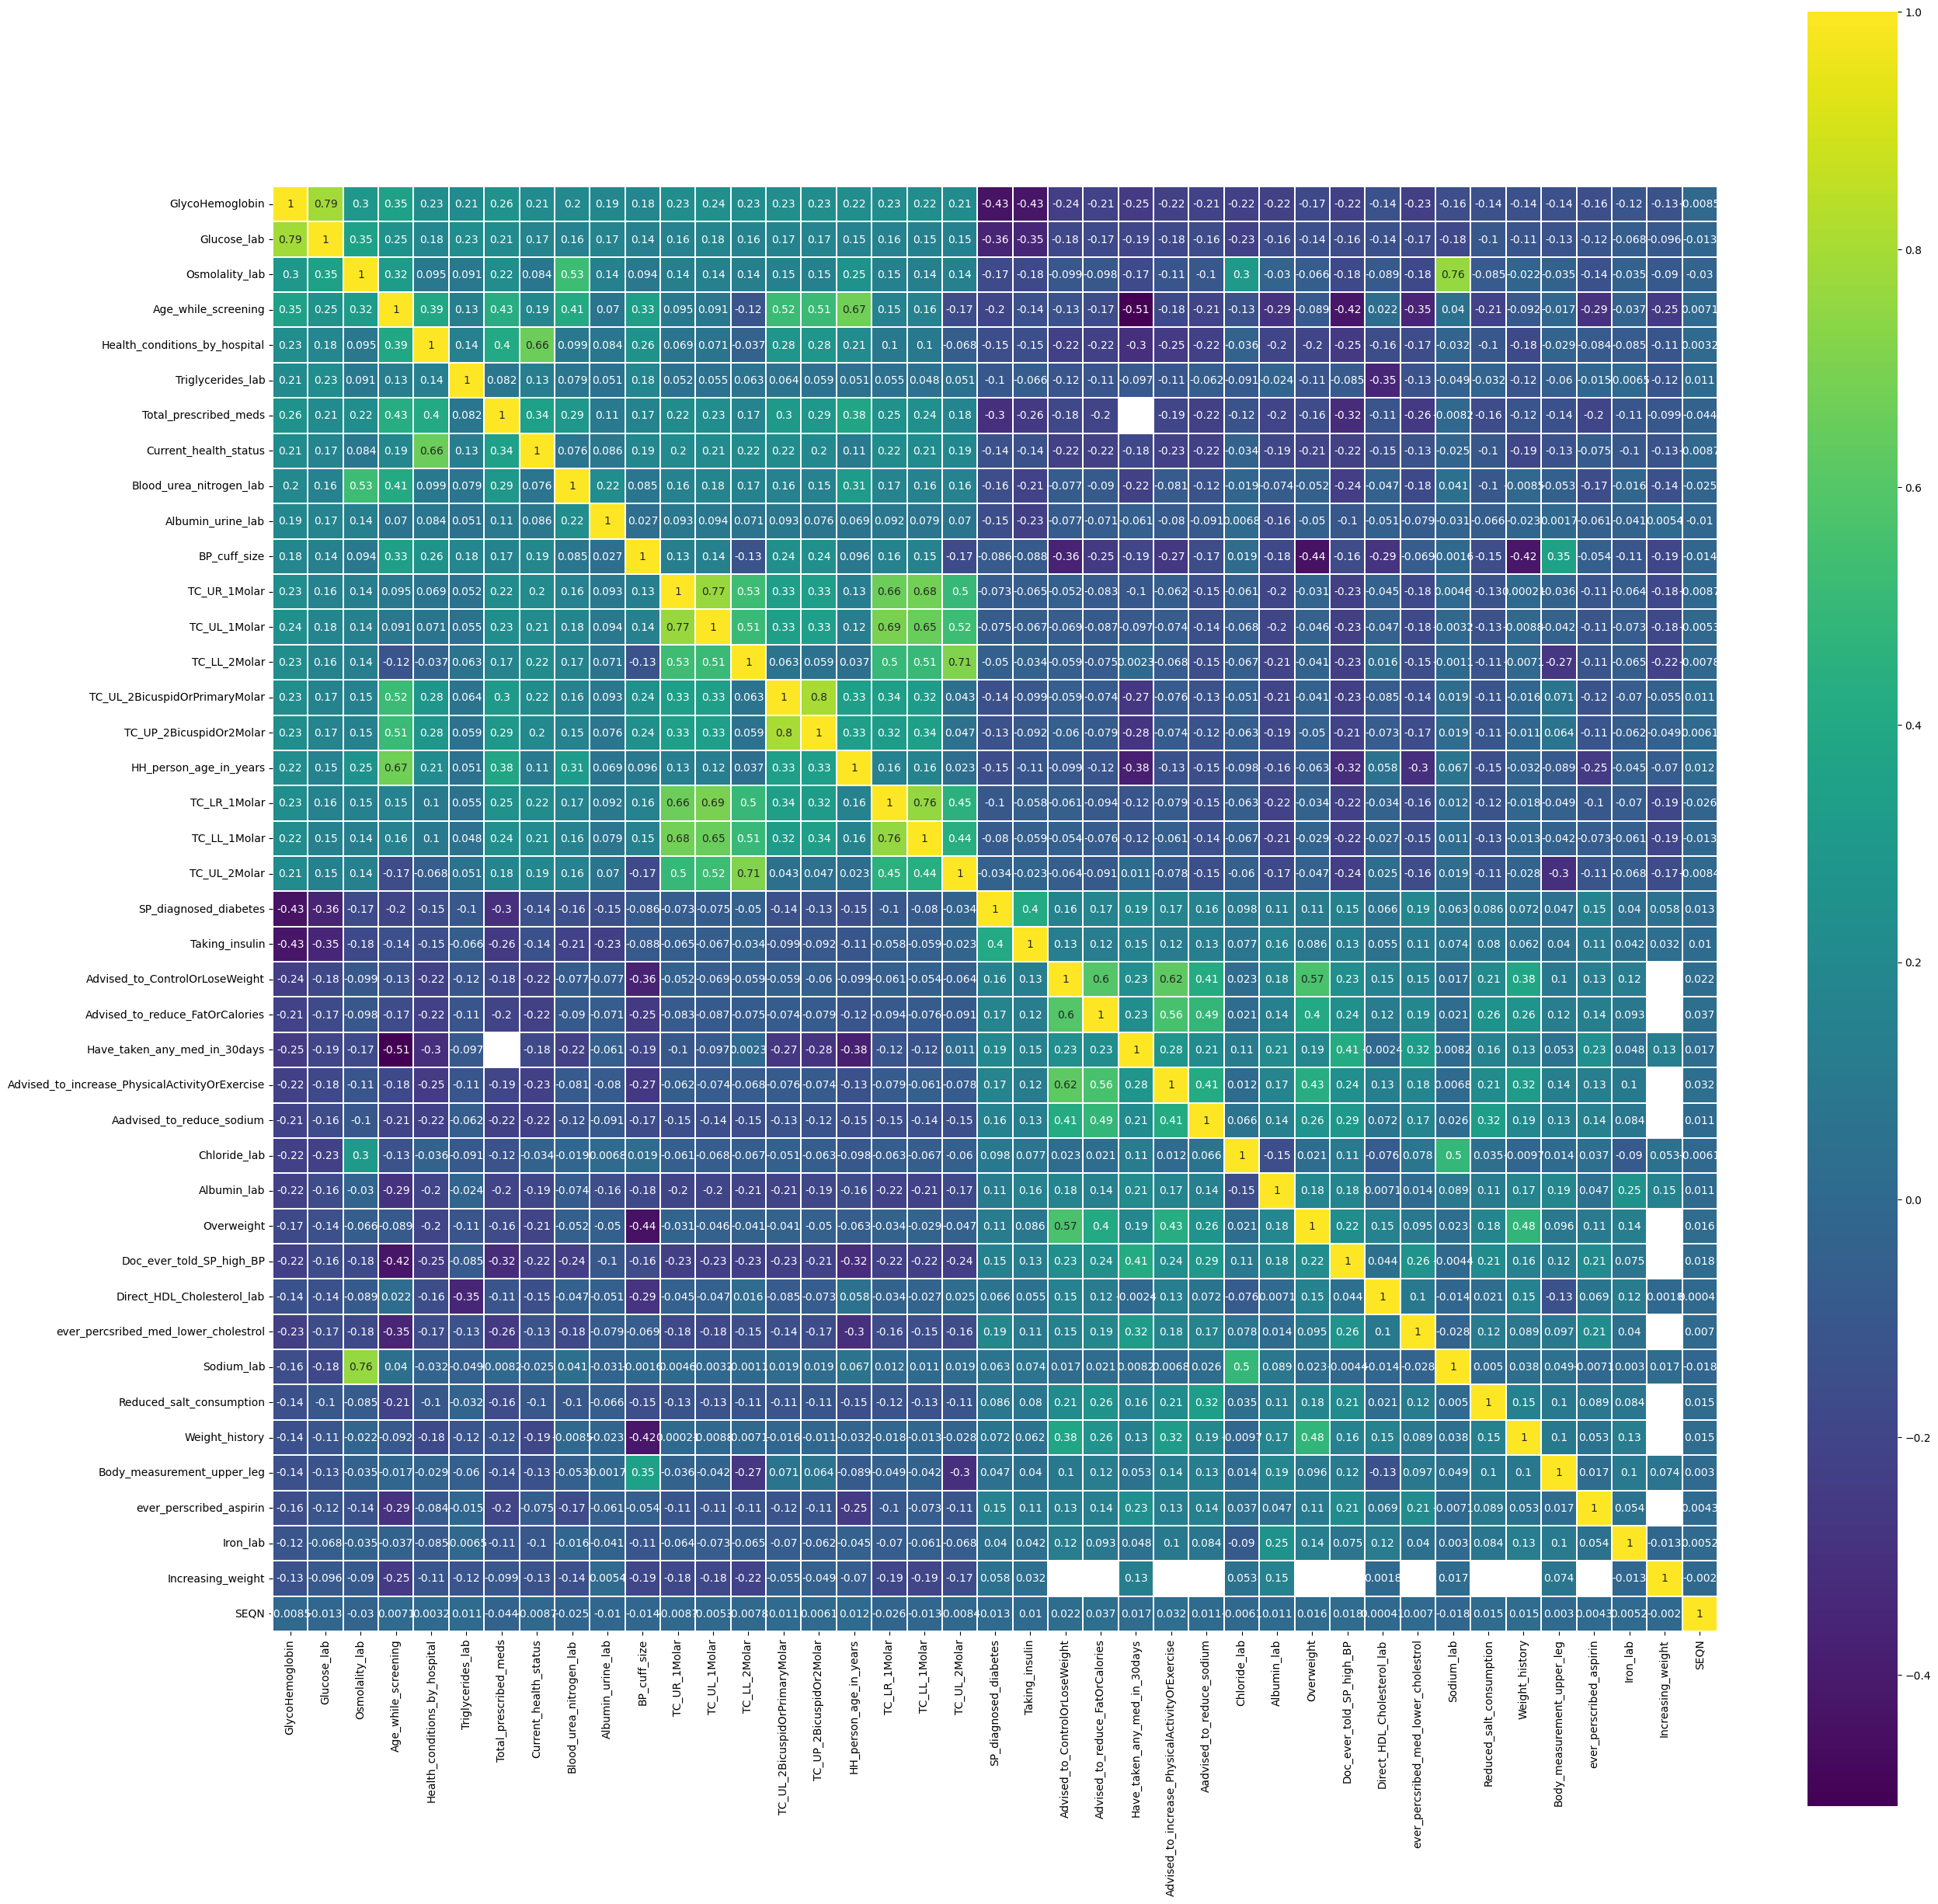

In [ ]:
viz.plot_heatmap(df_main)

##### *Redifing Target Feature*

In [ ]:
df_main = func.redefine_target_feature(df_main)
df_main


 Redifining the Target Feature to :
 0 - Normal, 1 - Prediabetic, 2 - diabetic: 



,GlycoHemoglobin,Glucose_lab,Osmolality_lab,Age_while_screening,Health_conditions_by_hospital,Triglycerides_lab,Total_prescribed_meds,Current_health_status,Blood_urea_nitrogen_lab,Albumin_urine_lab,...,ever_percsribed_med_lower_cholestrol,Sodium_lab,Reduced_salt_consumption,Weight_history,Body_measurement_upper_leg,ever_perscribed_aspirin,Iron_lab,Increasing_weight,SEQN,Diabetes
0,13.9,554.0,296.0,69,2,140.0,2.0,2.0,10.0,4.3,...,1.0,136.0,1.0,3.0,39.2,1.0,58.0,1.0,73557,2.0
1,9.1,219.0,265.0,54,4,257.0,4.0,4.0,16.0,153.0,...,1.0,128.0,2.0,3.0,40.0,1.0,79.0,1.0,73558,2.0
2,8.9,183.0,288.0,72,3,51.0,5.0,3.0,14.0,11.9,...,1.0,142.0,2.0,3.0,40.0,2.0,98.0,1.0,73559,2.0
3,NaN,NaN,NaN,9,2,NaN,NaN,NaN,NaN,16.0,...,NaN,NaN,NaN,NaN,33.5,NaN,NaN,1.0,73560,NaN
4,4.9,104.0,290.0,73,5,88.0,4.0,5.0,31.0,255.0,...,2.0,142.0,2.0,2.0,36.3,1.0,91.0,1.0,73561,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,5.0,101.0,285.0,26,4,76.0,NaN,3.0,13.0,1.9,...,2.0,143.0,2.0,3.0,41.4,NaN,73.0,1.0,83727,0.0
9809,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,83728,NaN
9810,5.3,112.0,277.0,42,3,106.0,NaN,NaN,10.0,6.0,...,2.0,139.0,1.0,1.0,40.0,2.0,49.0,1.0,83729,0.0
9811,NaN,NaN,NaN,7,1,NaN,NaN,NaN,NaN,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,83730,NaN


## Treating Outliers:

In [ ]:
print('\033[1m' + '\n Shape Before Treating Outliers:' + '\033[0m', df_main.shape)


 Shape Before Treating Outliers: (9813, 42)



 Boxplot: 



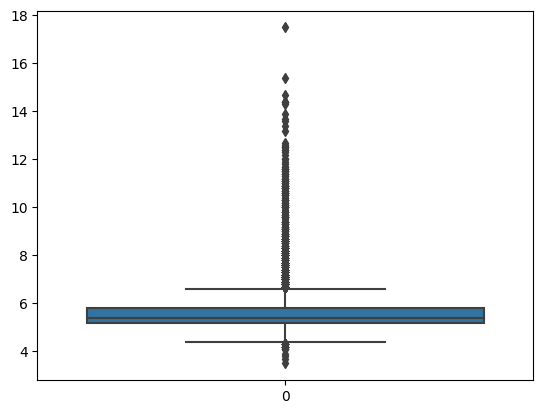

Outliers are : [7000 9222]


In [ ]:
func.remove_outliers_by_target()

In [ ]:
print('\033[1m' + '\n Shape After Treating Outliers:' + '\033[0m', df_main.shape)


 Shape After Treating Outliers: (9811, 40)


In [ ]:
df_main

,Glucose_lab,Osmolality_lab,Age_while_screening,Health_conditions_by_hospital,Triglycerides_lab,Total_prescribed_meds,Current_health_status,Blood_urea_nitrogen_lab,Albumin_urine_lab,BP_cuff_size,...,Direct_HDL_Cholesterol_lab,ever_percsribed_med_lower_cholestrol,Sodium_lab,Reduced_salt_consumption,Weight_history,Body_measurement_upper_leg,ever_perscribed_aspirin,Iron_lab,Increasing_weight,Diabetes
0,554.000000,296.0,69,2,140.000000,2.0,2.0,10.000000,4.3,4.0,...,65.000000,1.0,136.0,1.0,3.0,39.200000,1.0,58.000000,1.0,2.0
1,219.000000,265.0,54,4,257.000000,4.0,4.0,16.000000,153.0,4.0,...,50.000000,1.0,128.0,2.0,3.0,40.000000,1.0,79.000000,1.0,2.0
2,183.000000,288.0,72,3,51.000000,5.0,3.0,14.000000,11.9,4.0,...,60.000000,1.0,142.0,2.0,3.0,40.000000,2.0,98.000000,1.0,2.0
3,102.226954,279.0,9,2,143.084911,2.0,3.0,12.862179,16.0,2.0,...,61.000000,2.0,140.0,2.0,1.0,33.500000,2.0,83.451425,1.0,0.0
4,104.000000,290.0,73,5,88.000000,4.0,5.0,31.000000,255.0,3.0,...,85.000000,2.0,142.0,2.0,2.0,36.300000,1.0,91.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9806,101.000000,285.0,26,4,76.000000,2.0,3.0,13.000000,1.9,3.0,...,55.000000,2.0,143.0,2.0,3.0,41.400000,2.0,73.000000,1.0,0.0
9807,102.226954,279.0,2,2,143.084911,2.0,3.0,12.862179,8.4,4.0,...,53.105995,2.0,140.0,2.0,1.0,38.577959,2.0,83.451425,1.0,0.0
9808,112.000000,277.0,42,3,106.000000,2.0,3.0,10.000000,6.0,4.0,...,48.000000,2.0,139.0,1.0,1.0,40.000000,2.0,49.000000,1.0,0.0
9809,102.226954,279.0,7,1,143.084911,2.0,3.0,12.862179,4.5,4.0,...,51.000000,2.0,140.0,2.0,1.0,38.577959,2.0,83.451425,1.0,0.0


In [ ]:
df_main = df_main.drop(['GlycoHemoglobin'], axis=1)
df_main = df_main.drop(['SEQN'], axis=1)
df_main.head()

,Glucose_lab,Osmolality_lab,Age_while_screening,Health_conditions_by_hospital,Triglycerides_lab,Total_prescribed_meds,Current_health_status,Blood_urea_nitrogen_lab,Albumin_urine_lab,BP_cuff_size,...,Direct_HDL_Cholesterol_lab,ever_percsribed_med_lower_cholestrol,Sodium_lab,Reduced_salt_consumption,Weight_history,Body_measurement_upper_leg,ever_perscribed_aspirin,Iron_lab,Increasing_weight,Diabetes
0,554.0,296.0,69,2,140.0,2.0,2.0,10.0,4.3,4.0,...,65.0,1.0,136.0,1.0,3.0,39.2,1.0,58.0,1.0,2.0
1,219.0,265.0,54,4,257.0,4.0,4.0,16.0,153.0,4.0,...,50.0,1.0,128.0,2.0,3.0,40.0,1.0,79.0,1.0,2.0
2,183.0,288.0,72,3,51.0,5.0,3.0,14.0,11.9,4.0,...,60.0,1.0,142.0,2.0,3.0,40.0,2.0,98.0,1.0,2.0
3,NaN,NaN,9,2,NaN,NaN,NaN,NaN,16.0,2.0,...,61.0,NaN,NaN,NaN,NaN,33.5,NaN,NaN,1.0,NaN
4,104.0,290.0,73,5,88.0,4.0,5.0,31.0,255.0,3.0,...,85.0,2.0,142.0,2.0,2.0,36.3,1.0,91.0,1.0,0.0


## *`Imputing Null Values`*

In [ ]:
featuresTreatedByMedian = ['Osmolality_lab','Health_conditions_by_hospital','Total_prescribed_meds','Current_health_status',
'Albumin_urine_lab','BP_cuff_size', 'TC_UR_1Molar','TC_UL_1Molar',
'TC_LL_2Molar','TC_UL_2BicuspidOrPrimaryMolar','TC_UP_2BicuspidOr2Molar','TC_LR_1Molar','TC_LL_1Molar',
'SP_diagnosed_diabetes','Taking_insulin','Advised_to_ControlOrLoseWeight',
'Advised_to_reduce_FatOrCalories','Have_taken_any_med_in_30days',
'Advised_to_increase_PhysicalActivityOrExercise','Aadvised_to_reduce_sodium','Overweight',
'Doc_ever_told_SP_high_BP','ever_percsribed_med_lower_cholestrol','Sodium_lab',
'Reduced_salt_consumption','Weight_history','ever_perscribed_aspirin','Diabetes',
'Chloride_lab','Increasing_weight','TC_UL_2Molar']

featuresTreatedByMean = ['Age_while_screening', 'Triglycerides_lab', 'Glucose_lab','Blood_urea_nitrogen_lab','HH_person_age_in_years','Albumin_lab',
'Direct_HDL_Cholesterol_lab','Body_measurement_upper_leg','Iron_lab']


In [ ]:
df_main = func.treat_by_median(df_main, featuresTreatedByMedian)
df_main = func.treat_by_mean(df_main, featuresTreatedByMean)

In [ ]:
func.check_for_nulls_per(df_main)

                                                \n Null Values By Count \n  \
Glucose_lab                                                                      0   
Advised_to_reduce_FatOrCalories                                                  0   
Have_taken_any_med_in_30days                                                     0   
Advised_to_increase_PhysicalActivityOrExercise                                   0   
Aadvised_to_reduce_sodium                                                        0   
Chloride_lab                                                                     0   
Albumin_lab                                                                      0   
Overweight                                                                       0   
Advised_to_ControlOrLoseWeight                                                   0   
Doc_ever_told_SP_high_BP                                                         0   
ever_percsribed_med_lower_cholestrol                          

# Visualization:

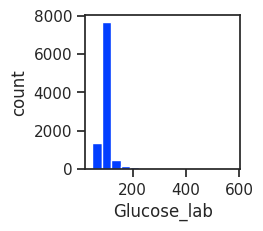

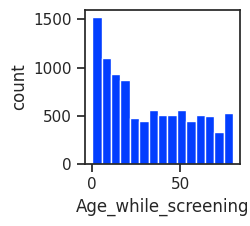

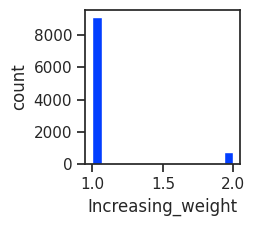

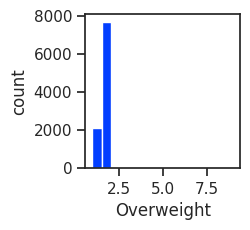

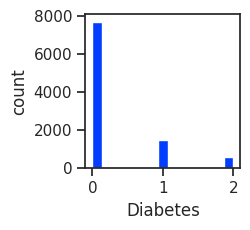

In [ ]:
# viz.plot_Histogram(df_main['Glucose_lab'],df_main)

viz.plot_Histogram('Glucose_lab',df_main)
viz.plot_Histogram('Age_while_screening',df_main)
viz.plot_Histogram('Increasing_weight',df_main)
viz.plot_Histogram('Overweight',df_main)
viz.plot_Histogram('Diabetes',df_main)

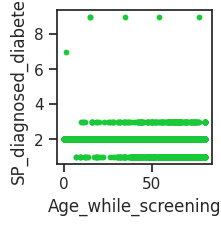

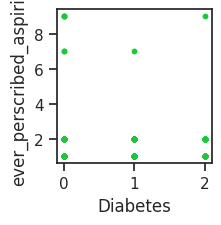

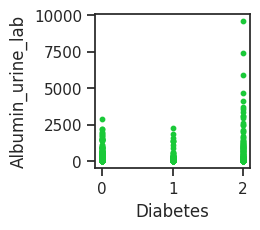

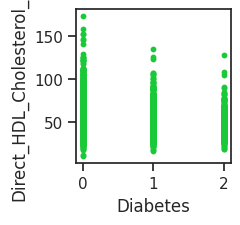

In [ ]:
viz.plot_scatteredplot('Age_while_screening','SP_diagnosed_diabetes', df_main)
viz.plot_scatteredplot('Diabetes','ever_perscribed_aspirin', df_main)
viz.plot_scatteredplot('Diabetes','Albumin_urine_lab', df_main)
viz.plot_scatteredplot('Diabetes','Direct_HDL_Cholesterol_lab', df_main)

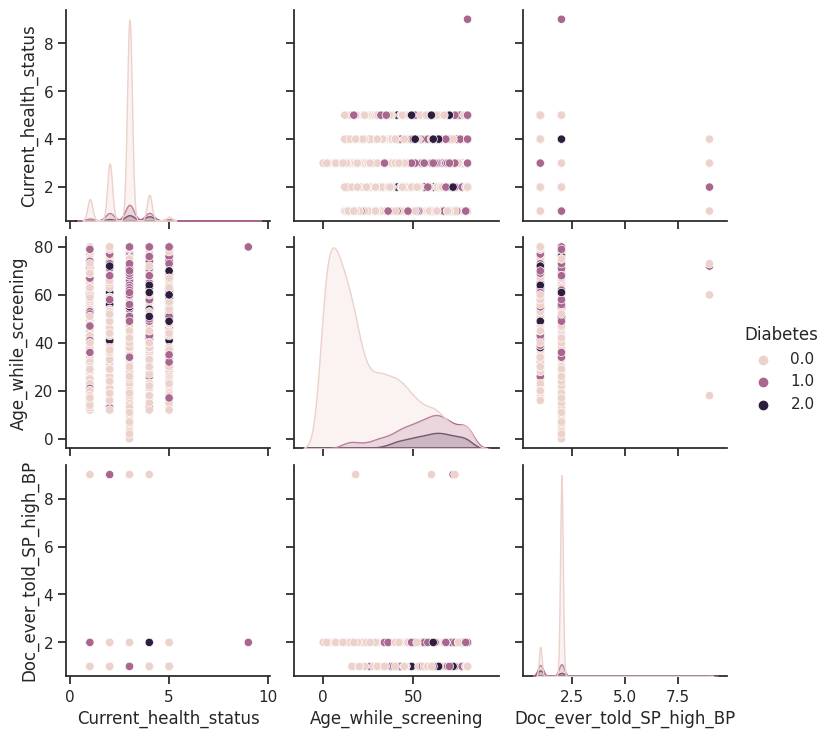

In [ ]:
sns.pairplot(df_main, hue='Diabetes', vars=["Current_health_status","Age_while_screening", "Doc_ever_told_SP_high_BP"])

<Axes: xlabel='Diabetes', ylabel='Body_measurement_upper_leg'>

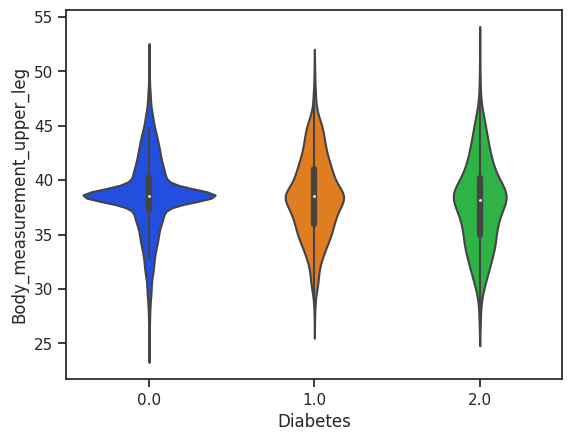

In [ ]:
sns.violinplot(x="Diabetes", y="Body_measurement_upper_leg", data=df_main)

<Axes: xlabel='Diabetes', ylabel='Total_prescribed_meds'>

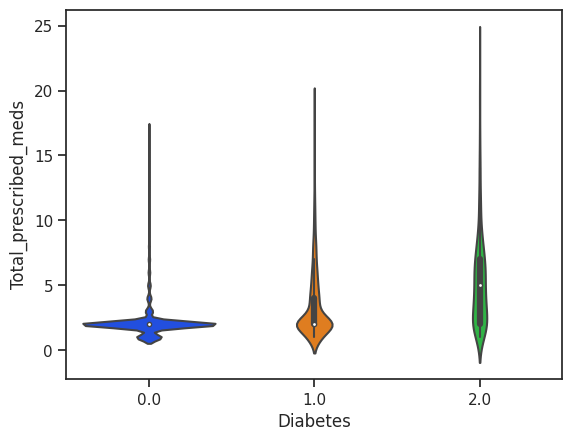

In [ ]:
sns.violinplot(x="Diabetes", y="Total_prescribed_meds", data=df_main)

# Checkpoint: 

# Load Checkpoint File:

# Data Preparation:

In [ ]:
x = df_main.drop(['Diabetes'], axis=1)
y = df_main[['Diabetes']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Feature Selection 

## Other Feature Importance 

1.   'CatBoostClassifier', 
2. 'XGBClassifier', 
3. 'RandomForestClassifier', 
4. 'ExtraTreesClassifier', 
5. 'LogisticRegression'
6. 'DecisionTreeClassifier_RFE'
7. 'chi-squared',
8. 'ANOVA'
   




 The most important 20 features for CatBoostClassifier: 

1 - Age_while_screening :  12.349842718864506
2 - Glucose_lab :  11.034475354821433
3 - Iron_lab :  6.189123265712889
4 - Body_measurement_upper_leg :  6.162187173624189
5 - Albumin_urine_lab :  6.110509499575484
6 - Triglycerides_lab :  5.984352988068365
7 - Direct_HDL_Cholesterol_lab :  5.243455791560263
8 - Blood_urea_nitrogen_lab :  4.163976059085132
9 - Albumin_lab :  3.873089889416216
10 - HH_person_age_in_years :  3.720176089963341
11 - SP_diagnosed_diabetes :  3.3234866497361693
12 - Chloride_lab :  3.0943697354010737
13 - Osmolality_lab :  2.836486690994971
14 - Sodium_lab :  2.1471101437063407
15 - Current_health_status :  2.003170493932193
16 - Health_conditions_by_hospital :  1.9475278879184013
17 - BP_cuff_size :  1.8765769683745313
18 - Total_prescribed_meds :  1.7157676783600155
19 - TC_UL_2Molar :  1.2756216465003416
20 - ever_percsribed_med_lower_cholestrol :  1.1499047044607487

Plotting the Feature Importance

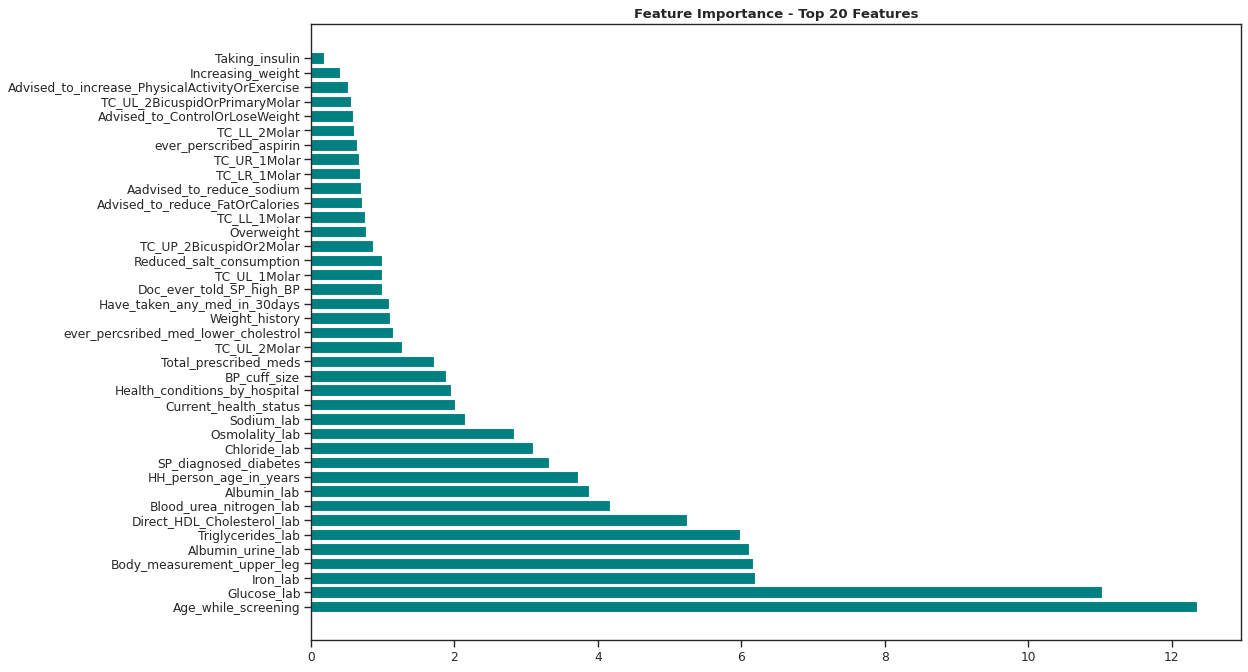


 The most important 20 features for XGBClassifier: 

1 - SP_diagnosed_diabetes :  0.16546582
2 - Age_while_screening :  0.13971694
3 - Glucose_lab :  0.06403757
4 - Taking_insulin :  0.035590544
5 - BP_cuff_size :  0.035148926
6 - Increasing_weight :  0.031201707
7 - ever_percsribed_med_lower_cholestrol :  0.02482969
8 - Direct_HDL_Cholesterol_lab :  0.019733747
9 - Advised_to_ControlOrLoseWeight :  0.019139005
10 - Weight_history :  0.018603742
11 - Albumin_lab :  0.018294472
12 - Sodium_lab :  0.017783267
13 - Current_health_status :  0.017685933
14 - Iron_lab :  0.017562404
15 - TC_LL_1Molar :  0.017427323
16 - Albumin_urine_lab :  0.017376559
17 - Have_taken_any_med_in_30days :  0.017308908
18 - Body_measurement_upper_leg :  0.01710243
19 - TC_LL_2Molar :  0.01700393
20 - Advised_to_reduce_FatOrCalories :  0.0163917

Plotting the Feature Importance Graph for the XGBClassifier :



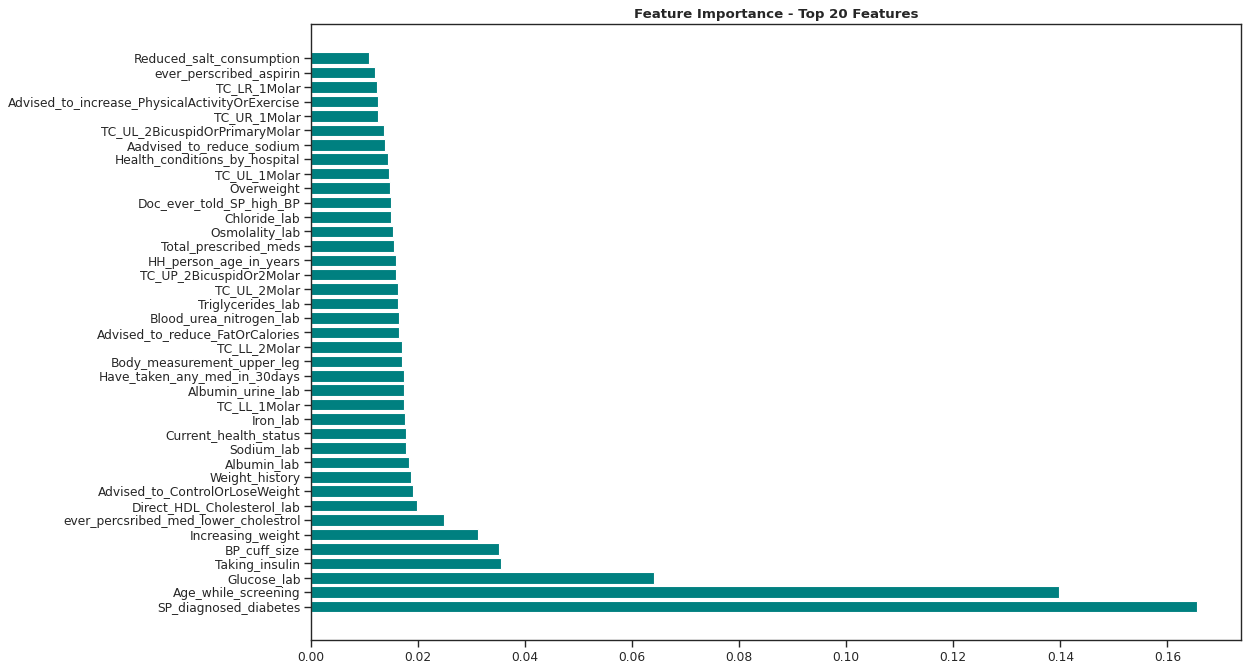


 The most important 20 features for RandomForestClassifier: 

1 - Glucose_lab :  0.12696324627357333
2 - Age_while_screening :  0.12346167086170257
3 - SP_diagnosed_diabetes :  0.0687605995092863
4 - HH_person_age_in_years :  0.05119186123186328
5 - Iron_lab :  0.04236143043815055
6 - Triglycerides_lab :  0.042208291947103904
7 - Albumin_lab :  0.0417379326122333
8 - Body_measurement_upper_leg :  0.041620450826859036
9 - Albumin_urine_lab :  0.04122522599711477
10 - Direct_HDL_Cholesterol_lab :  0.03846228730915581
11 - Osmolality_lab :  0.03674023240044382
12 - Blood_urea_nitrogen_lab :  0.03166966970927785
13 - Chloride_lab :  0.027177500405089147
14 - Total_prescribed_meds :  0.02619269095816168
15 - Sodium_lab :  0.023435016918024253
16 - Doc_ever_told_SP_high_BP :  0.02007605166764488
17 - ever_percsribed_med_lower_cholestrol :  0.019344978627713127
18 - Current_health_status :  0.01501303279462627
19 - Health_conditions_by_hospital :  0.014438779972668453
20 - ever_perscribed_as

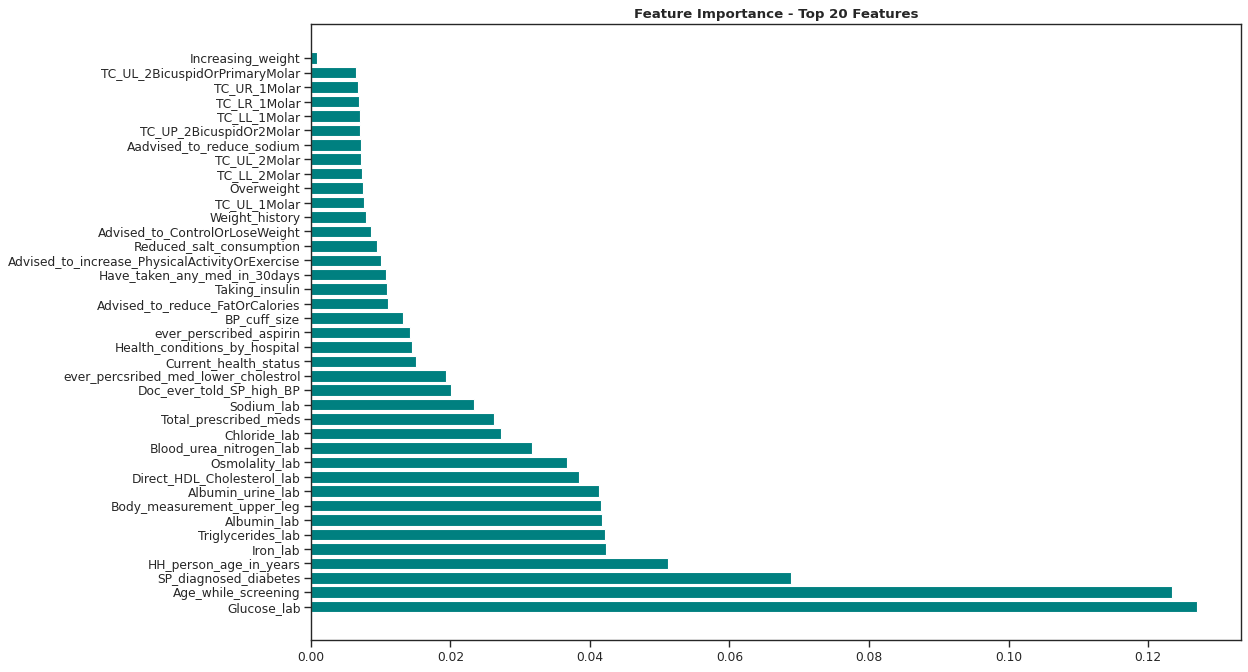


 The most important 20 features for ExtraTreesClassifier: 

1 - Age_while_screening :  0.09913503298463752
2 - Glucose_lab :  0.07225051431813996
3 - SP_diagnosed_diabetes :  0.056254431498145505
4 - HH_person_age_in_years :  0.04411783351381219
5 - Advised_to_increase_PhysicalActivityOrExercise :  0.03131222998928883
6 - Total_prescribed_meds :  0.030625618310464956
7 - Triglycerides_lab :  0.030000630366492233
8 - Osmolality_lab :  0.029877507980113956
9 - Body_measurement_upper_leg :  0.029286757739807264
10 - Albumin_lab :  0.028587258807348782
11 - Direct_HDL_Cholesterol_lab :  0.027984759707007072
12 - Iron_lab :  0.02789492491863493
13 - Albumin_urine_lab :  0.027588451771816777
14 - Blood_urea_nitrogen_lab :  0.027323126958243068
15 - Chloride_lab :  0.027301120535164026
16 - Sodium_lab :  0.026395054250273685
17 - ever_percsribed_med_lower_cholestrol :  0.025972739481936968
18 - Health_conditions_by_hospital :  0.023761228537307263
19 - Current_health_status :  0.022764043309

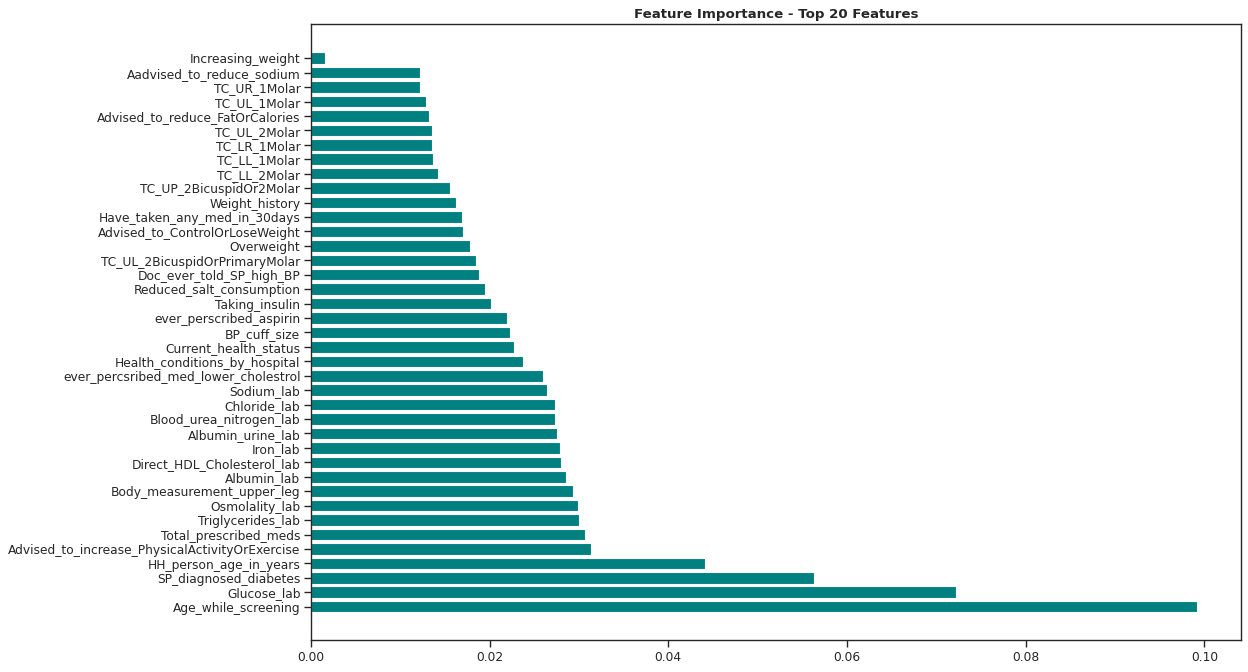


 The most important 20 features for LogisticRegression: 

1 - SP_diagnosed_diabetes :  0.7148536344091364
2 - Increasing_weight :  0.44570077631036326
3 - Sodium_lab :  0.34371319575522546
4 - ever_percsribed_med_lower_cholestrol :  0.29715650050623893
5 - BP_cuff_size :  0.28777624526298645
6 - Taking_insulin :  0.28729179170089997
7 - Advised_to_ControlOrLoseWeight :  0.19569379967583822
8 - Advised_to_increase_PhysicalActivityOrExercise :  0.1923229219765022
9 - Osmolality_lab :  0.18864159762936714
10 - Albumin_lab :  0.18267472277161922
11 - Aadvised_to_reduce_sodium :  0.1311710670986992
12 - Current_health_status :  0.11245046018168962
13 - Advised_to_reduce_FatOrCalories :  0.08775037517338183
14 - Blood_urea_nitrogen_lab :  0.07043638583383066
15 - TC_UL_2BicuspidOrPrimaryMolar :  0.06967678372359694
16 - ever_perscribed_aspirin :  0.06417010185290749
17 - Overweight :  0.06289431139608322
18 - Age_while_screening :  0.0535978153427456
19 - TC_UP_2BicuspidOr2Molar :  0.049578

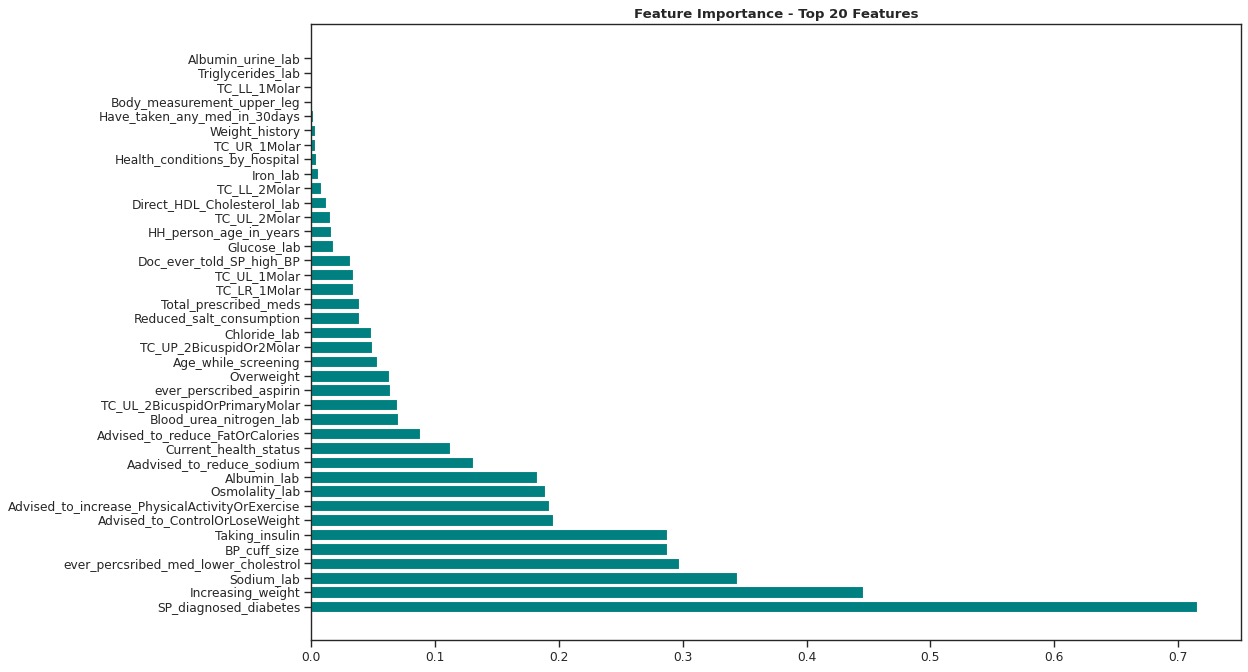


 The most important 20 features for DecisionTreeClassifier_RFE: 

1 - Age_while_screening :  0.26006520701936886
2 - Glucose_lab :  0.16286275658187815
3 - SP_diagnosed_diabetes :  0.06445699569367307
4 - TC_LL_2Molar :  0.06268213869220816
5 - Albumin_urine_lab :  0.06171571415066445
6 - TC_UL_2Molar :  0.05142235407027152
7 - Triglycerides_lab :  0.051375022868958085
8 - TC_LR_1Molar :  0.04332276626571824
9 - Blood_urea_nitrogen_lab :  0.03148521503723881
10 - HH_person_age_in_years :  0.030802133221267503
11 - Osmolality_lab :  0.028888323191112078
12 - TC_UL_1Molar :  0.028692527679335358
13 - BP_cuff_size :  0.023705012078995762
14 - Health_conditions_by_hospital :  0.020728952793933098
15 - TC_UP_2BicuspidOr2Molar :  0.017381602382673233
16 - TC_LL_1Molar :  0.016102955095787148
17 - Total_prescribed_meds :  0.01523069755194994
18 - TC_UL_2BicuspidOrPrimaryMolar :  0.011168388716135257
19 - TC_UR_1Molar :  0.010144595534903617
20 - Current_health_status :  0.00776664137392765



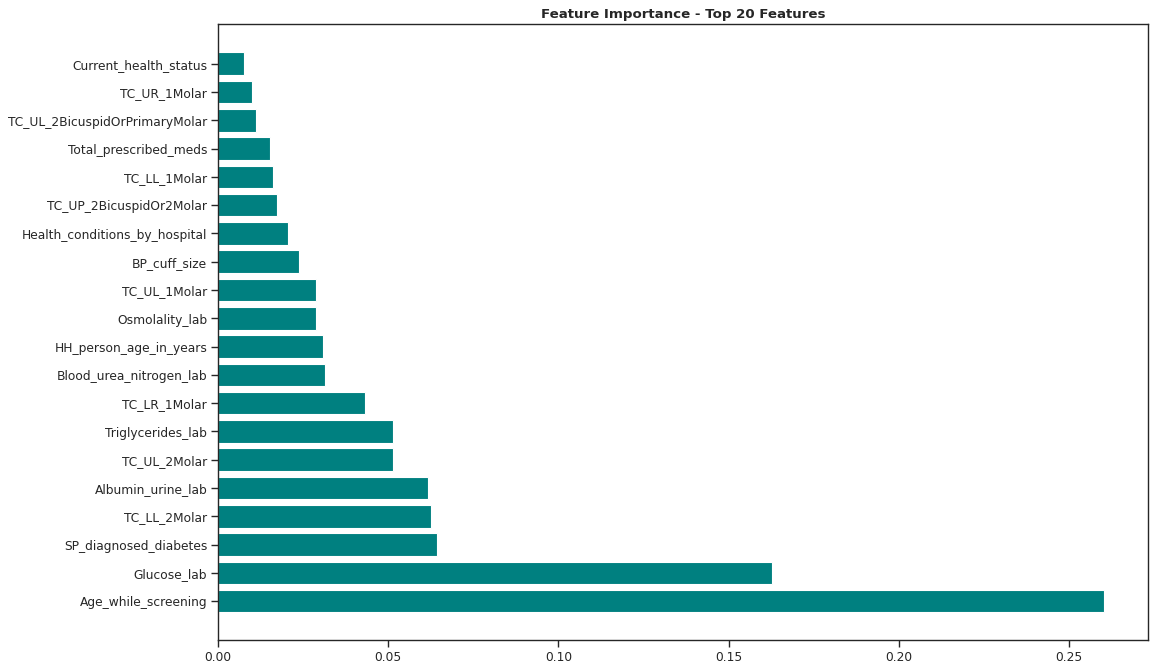


 The most important 20 features for chi-squared: 

1 - Albumin_urine_lab :  348789.63169510773
2 - Age_while_screening :  40706.106075953125
3 - Glucose_lab :  25525.304642723175
4 - Triglycerides_lab :  19970.555791634386
5 - HH_person_age_in_years :  5410.456287408785
6 - Total_prescribed_meds :  1725.5069649612733
7 - Iron_lab :  1177.9139290343956
8 - Blood_urea_nitrogen_lab :  629.676451111248
9 - Direct_HDL_Cholesterol_lab :  511.49809487416826
10 - Health_conditions_by_hospital :  316.9940198561709
11 - TC_UP_2BicuspidOr2Molar :  278.4248392786956
12 - TC_UL_2BicuspidOrPrimaryMolar :  275.8461633503197
13 - Have_taken_any_med_in_30days :  140.1223518148977
14 - Doc_ever_told_SP_high_BP :  109.12891054235754
15 - SP_diagnosed_diabetes :  98.20925571686425
16 - Reduced_salt_consumption :  92.22680287882065
17 - Advised_to_increase_PhysicalActivityOrExercise :  88.14226661218531
18 - ever_percsribed_med_lower_cholestrol :  86.40929902212648
19 - Advised_to_ControlOrLoseWeight :  6

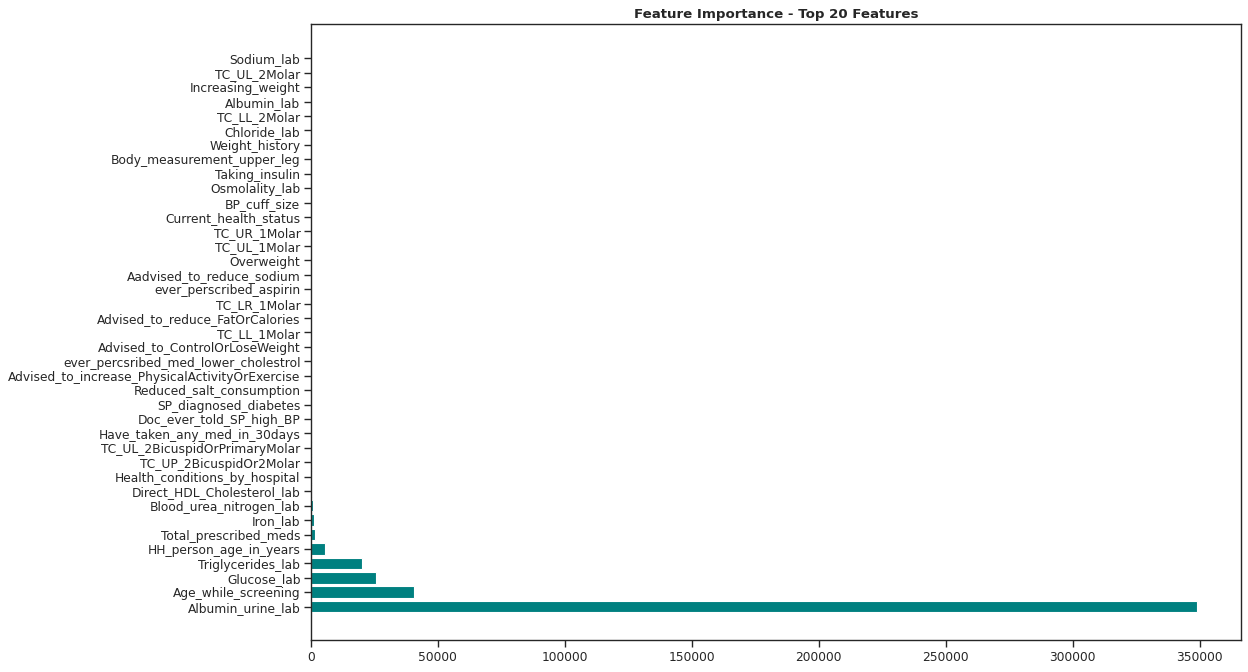


 The most important 20 features for anova: 

1 - Glucose_lab :  2075.6053095025195
2 - Age_while_screening :  1566.64575291521
3 - SP_diagnosed_diabetes :  1071.033585437822
4 - Total_prescribed_meds :  694.1958428762846
5 - Doc_ever_told_SP_high_BP :  629.2712156630416
6 - Taking_insulin :  605.2626553291568
7 - HH_person_age_in_years :  595.2716795116623
8 - ever_percsribed_med_lower_cholestrol :  557.4079464020336
9 - Advised_to_increase_PhysicalActivityOrExercise :  534.624131611907
10 - Have_taken_any_med_in_30days :  507.273772084238
11 - ever_perscribed_aspirin :  498.08411809304744
12 - Advised_to_ControlOrLoseWeight :  468.34488808678964
13 - Reduced_salt_consumption :  391.6530179026553
14 - Aadvised_to_reduce_sodium :  391.21688891406643
15 - Advised_to_reduce_FatOrCalories :  386.94670578196974
16 - TC_UP_2BicuspidOr2Molar :  374.7962227768416
17 - TC_UL_2BicuspidOrPrimaryMolar :  361.4471054749884
18 - Health_conditions_by_hospital :  353.4574049305798
19 - Overweight :  

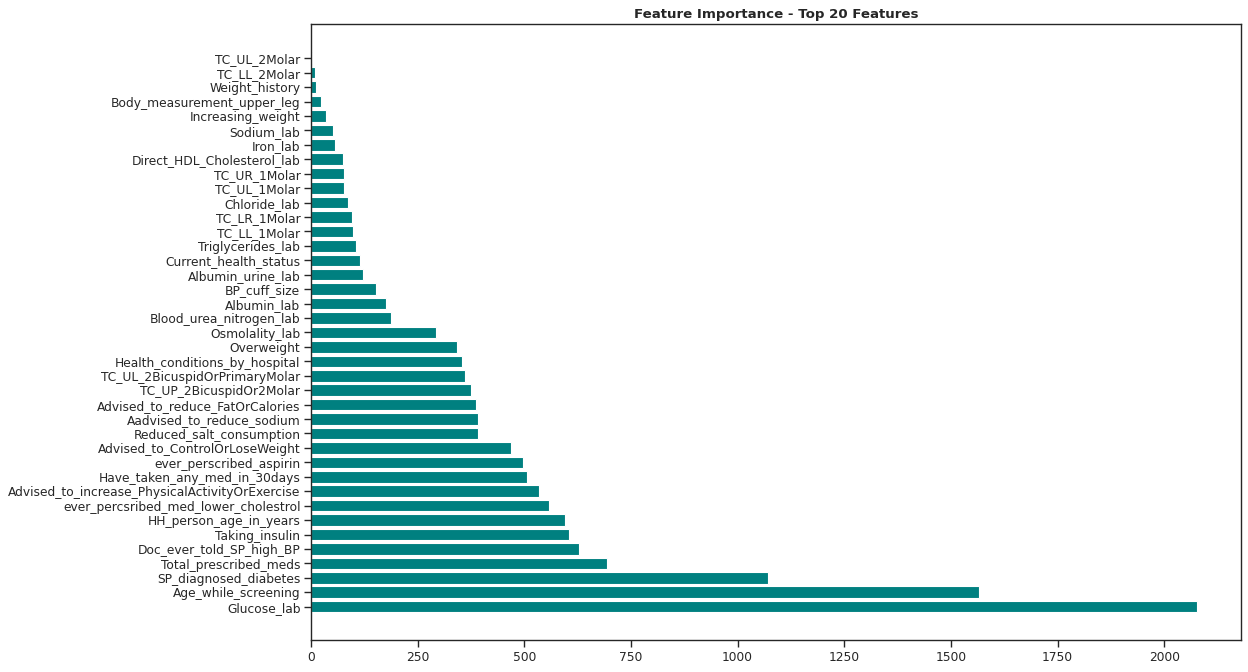

Top 5 features for each model:

1. CatBoostClassifier: ['Age_while_screening', 'Glucose_lab', 'Iron_lab', 'Body_measurement_upper_leg', 'Albumin_urine_lab']

2. XGBClassifier: ['SP_diagnosed_diabetes', 'Age_while_screening', 'Glucose_lab', 'Taking_insulin', 'BP_cuff_size']

3. RandomForestClassifier: ['Glucose_lab', 'Age_while_screening', 'SP_diagnosed_diabetes', 'HH_person_age_in_years', 'Iron_lab']

4. ExtraTreesClassifier: ['Age_while_screening', 'Glucose_lab', 'SP_diagnosed_diabetes', 'HH_person_age_in_years', 'Advised_to_increase_PhysicalActivityOrExercise']

5. LogisticRegression: ['SP_diagnosed_diabetes', 'Increasing_weight', 'Sodium_lab', 'ever_percsribed_med_lower_cholestrol', 'BP_cuff_size']

6. DecisionTreeClassifier_RFE: ['Age_while_screening', 'Glucose_lab', 'SP_diagnosed_diabetes', 'TC_LL_2Molar', 'Albumin_urine_lab']

7. chi-squared: ['Albumin_urine_lab', 'Age_while_screening', 'Glucose_lab', 'Triglycerides_lab', 'HH_person_age_in_years']

8. anova: ['Glucose_lab', 'Age_

In [ ]:
models = ['CatBoostClassifier', 'XGBClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier', 'LogisticRegression','DecisionTreeClassifier_RFE','chi-squared','anova']

feature_list = []
for model_name in models:
    # Train the model
    model = feature_imp.train_model(model_name, X_train, y_train)
    
    # Get the top 5 features
    Top20_features = feature_imp.feature_imp(model_name, model, X_train)
    top5_features = Top20_features[:5]
    
    feature_list.append(top5_features)
    
print("Top 5 features for each model:\n")
for i, model_name in enumerate(models):
    print(f"{i+1}. {model_name}: {feature_list[i]}\n")


## Select 10 most Important features from above feature selection methods

## Data Preparation:

In [ ]:
#Top 5 features for each model:

CatBoostClassifier = ['Age_while_screening', 'Glucose_lab', 'Iron_lab', 'Body_measurement_upper_leg', 'Albumin_urine_lab']

XGBClassifier = ['SP_diagnosed_diabetes', 'Age_while_screening', 'Glucose_lab', 'Taking_insulin', 'BP_cuff_size']

RandomForestClassifier = ['Glucose_lab', 'Age_while_screening', 'SP_diagnosed_diabetes', 'HH_person_age_in_years', 'Triglycerides_lab']

ExtraTreesClassifier = ['Age_while_screening', 'Glucose_lab', 'SP_diagnosed_diabetes', 'HH_person_age_in_years', 'Osmolality_lab']

LogisticRegression= ['SP_diagnosed_diabetes', 'Increasing_weight', 'Sodium_lab', 'ever_percsribed_med_lower_cholestrol', 'BP_cuff_size']

DecisionTreeClassifier_RFE= ['Age_while_screening', 'Glucose_lab', 'SP_diagnosed_diabetes', 'TC_LL_2Molar', 'Albumin_urine_lab']

chi_squared= ['Albumin_urine_lab', 'Age_while_screening', 'Glucose_lab', 'Triglycerides_lab', 'HH_person_age_in_years']

anova=['Glucose_lab', 'Age_while_screening', 'SP_diagnosed_diabetes', 'Total_prescribed_meds', 'Doc_ever_told_SP_high_BP']




In [ ]:
# Most Important Features
# Selected_Features = ['Age_while_screening', 'Glucose_lab', 'Albumin_urine_lab','SP_diagnosed_diabetes',
#                      'BP_cuff_size' , 'HH_person_age_in_years','Triglycerides_lab','Iron_lab','Taking_insulin','TC_LL_2Molar']
Selected_Features=['Age_while_screening', 'Glucose_lab', 'Albumin_urine_lab','SP_diagnosed_diabetes',
                     'BP_cuff_size' , 'HH_person_age_in_years','Triglycerides_lab','Iron_lab','Taking_insulin','TC_LL_2Molar','Sodium_lab']
x = df_main[Selected_Features]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Standardizing data

In [ ]:
X_train, X_test = func.standardscaling(X_train, X_test)

# Data Modeling

## Basline Model - Decision Tree


Testing Performance Metrics for the DecisionTreeClassifier :

                            R2: 0.16
      Mean Squared Error (MSE): 0.26
Root Mean Squared Error (RMSE): 0.51
                      F1 Score: 0.78
                      Accuracy: 78.33%


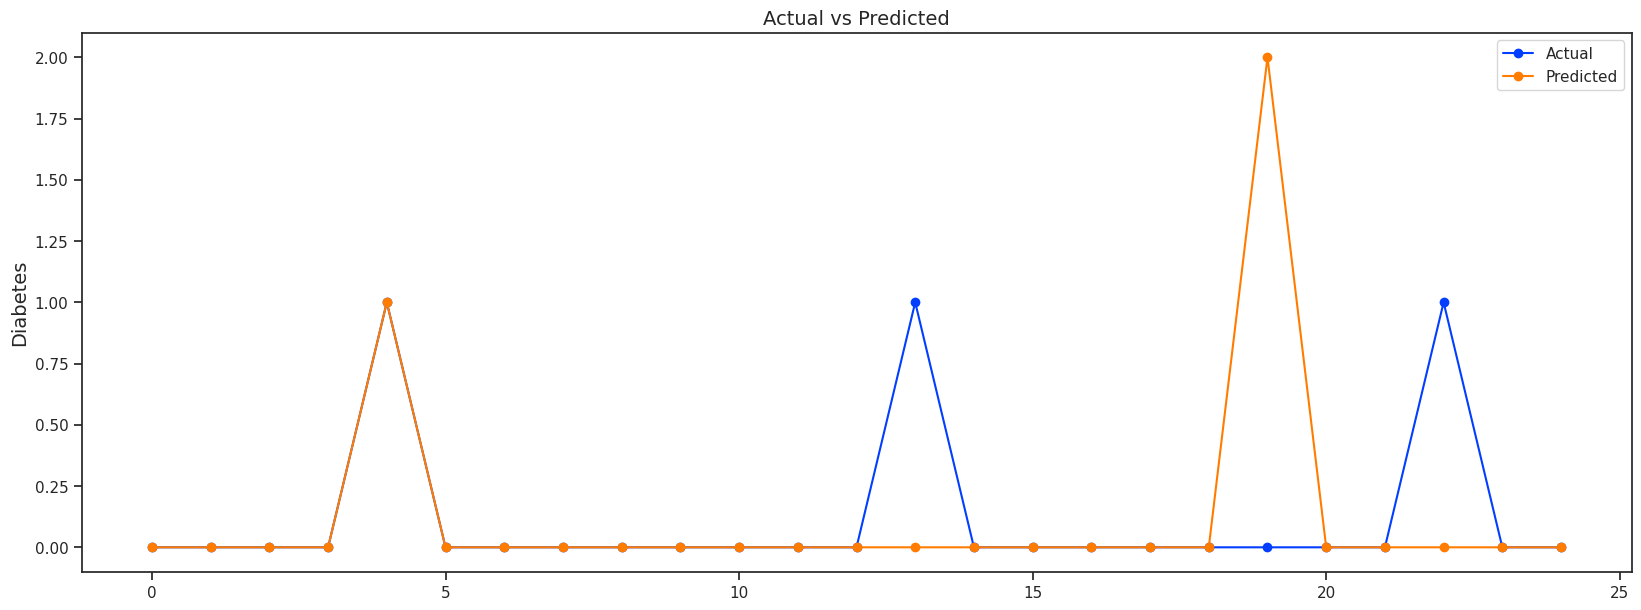

In [ ]:
cls_model_obj.modeling_without_tuning('DecisionTreeClassifier', X_train, y_train, X_test, y_test)

## Advanced Models:

### Random Forest Classifier:


Testing Performance Metrics for the RandomForestClassifier :

                            R2: 0.41
      Mean Squared Error (MSE): 0.18
Root Mean Squared Error (RMSE): 0.43
                      F1 Score: 0.84
                      Accuracy: 84.21%


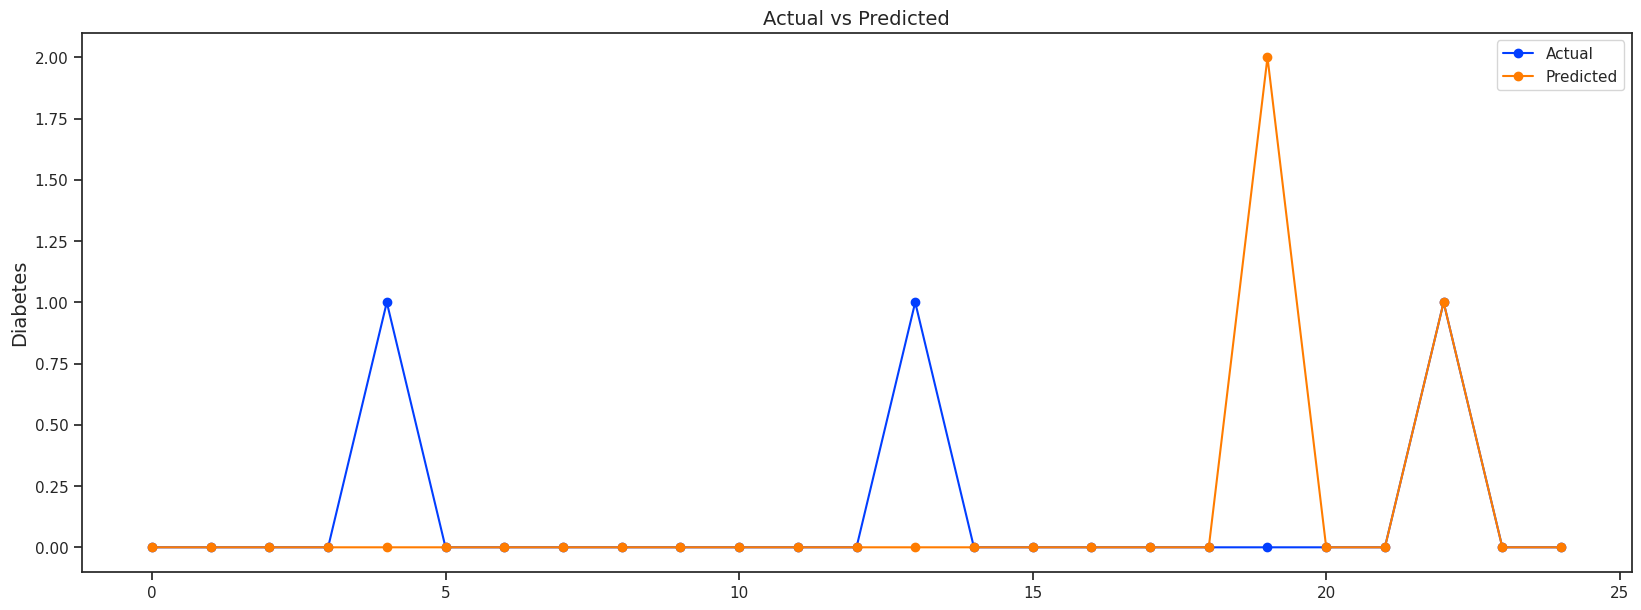

In [ ]:

from sklearn.ensemble import RandomForestClassifier
cls_model_obj.modeling_without_tuning('RandomForestClassifier',X_train,y_train,X_test,y_test)

### Logistic Regression:


Testing Performance Metrics for the LogisticRegression :

                            R2: 0.39
      Mean Squared Error (MSE): 0.19
Root Mean Squared Error (RMSE): 0.43
                      F1 Score: 0.84
                      Accuracy: 84.07%


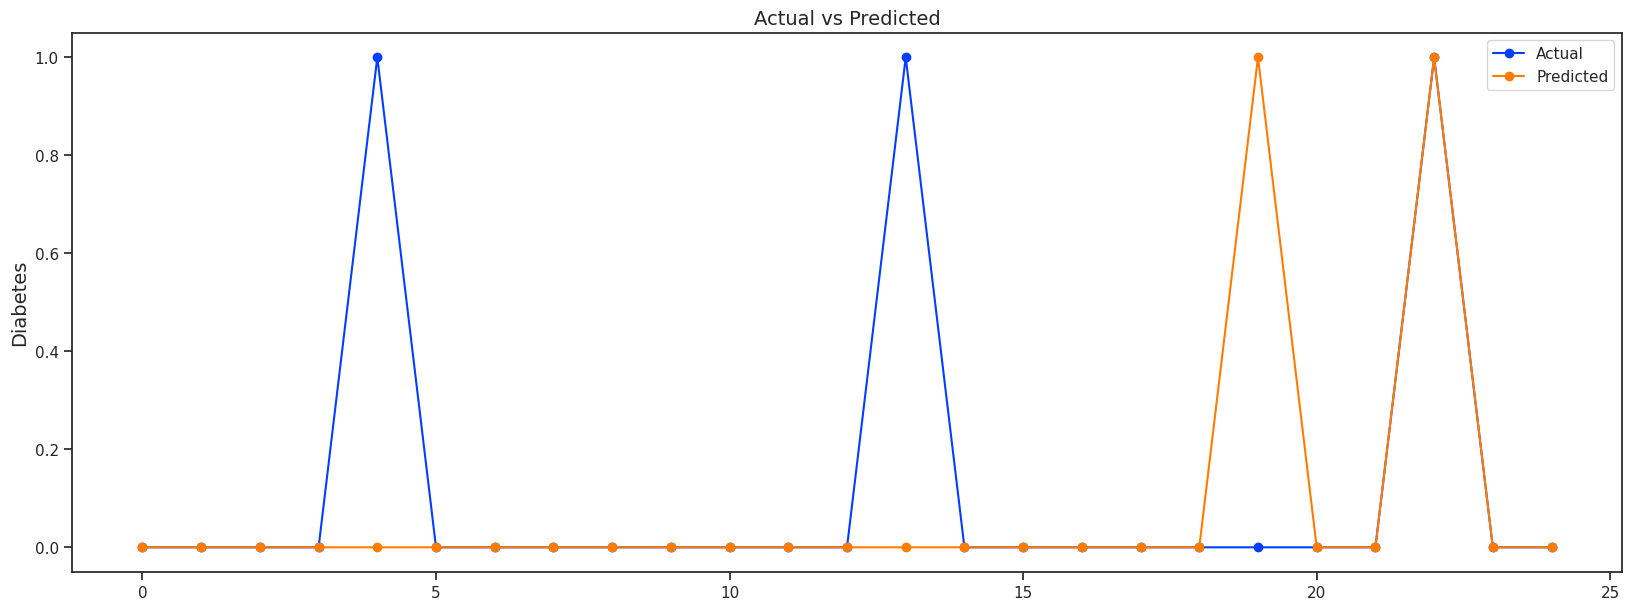

In [ ]:
from sklearn.linear_model import LogisticRegression
cls_model_obj.modeling_without_tuning('LogisticRegression',X_train,y_train,X_test,y_test)

### Catboost Classifier:


Testing Performance Metrics for the CatBoostClassifier :

                            R2: 0.41
      Mean Squared Error (MSE): 0.18
Root Mean Squared Error (RMSE): 0.43
                      F1 Score: 0.84
                      Accuracy: 84.07%


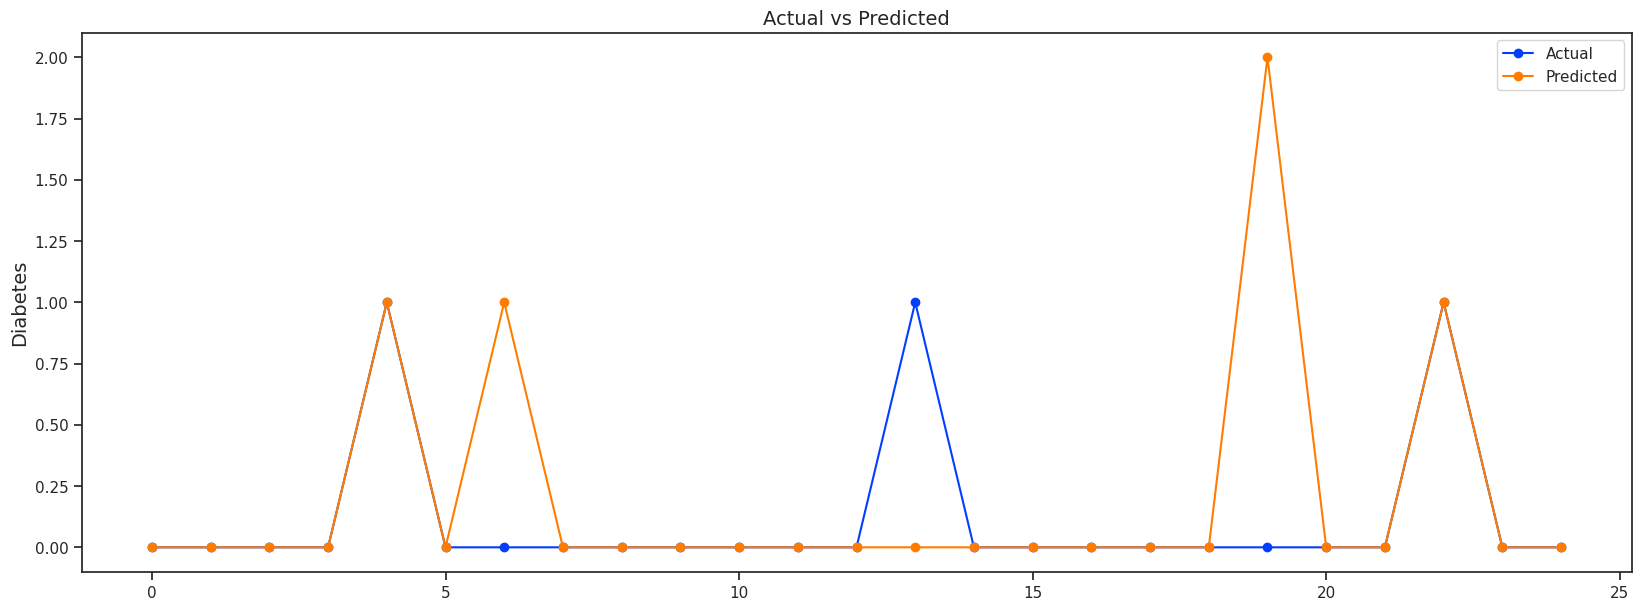

In [ ]:
from catboost import CatBoostClassifier
cls_model_obj.modeling_without_tuning('CatBoostClassifier',X_train,y_train,X_test,y_test)

### SVM Classifier:

In [ ]:
from sklearn.svm import SVC
cls_model_obj.modeling_without_tuning('SVM',X_train,y_train,X_test,y_test)

### Naive Bayes:

In [ ]:
from sklearn.naive_bayes import GaussianNB
cls_model_obj.modeling_without_tuning('NaiveBayes',X_train,y_train,X_test,y_test)

#Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import f1_score
import time
from sklearn.metrics import auc, roc_curve, roc_auc_score,confusion_matrix
from itertools import cycle
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns  # plotting
from scipy import stats


from prettytable import PrettyTable  # To print in tabular format

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.metrics import auc, f1_score, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict

%matplotlib inline

## Logistic Regression
We are starting with basic Logistic Regression for training our data.
Going to tune hyperparameter "alpha" and "penalty"

### Tuning "alpha" for l2 "penalty"

In [ ]:

# Tuning "alpha" for l2 "penalty"

clf = SGDClassifier(loss='log', penalty='l2')
param = {'alpha':np.logspace(-6, 1, 8)}  # Values of alpha

lr_clf = hyperparam_tuning(clf, param, X_train, y_train, cv=3)

NameError: ignored

In [ ]:
# Plotting the result to select best parameter
result_visualization(lr_clf, param, param1= 'alpha')

NameError: ignored

### Tuning "alpha" for l1 "penalty"

In [ ]:
# Tuning "alpha" for l1 "penalty"
clf = SGDClassifier(loss='log', penalty='l1')
param = {'alpha':np.logspace(-6, 1, 8)}  # Values of alpha

lr_clf = hyperparam_tuning(clf, param, X_train, y_train)

In [ ]:
# Plotting alpha vs score
result_visualization(lr_clf, param, 'alpha')

### Best Logistic Regression model

In [ ]:
# Best LR model
lr_bst_clf = SGDClassifier(penalty='l1', alpha=1e-6)

In [ ]:
# Getting best model's performance on train and test data
lr_clf, lr_auc, lr_f1, lr_far = evaluate_result(lr_bst_clf, X_train, y_train, X_test, y_test, 'LR')

In [ ]:
# An empty dictionary to store the result Logistic Regresiion model

In [ ]:
# An empty dictionary to store the result of all the models
result_dict = {"name":[], "auc":[], "f1":[], "far":[]}
# Storinig result for LR
result_dict['name'].append("LR")
result_dict['auc'].append(lr_auc)
result_dict['f1'].append(lr_f1)
result_dict['far'].append(lr_far)

In [ ]:
result_dict

### Linear SVC

#### The next model we are going to try is Linear Support Vector Classifier

#### Tune parameters for "alpha" and "penalty"

In [ ]:
# Tuning "alpha" and "penalty"
clf = SGDClassifier(loss='hinge')
param = {'alpha':[10**x for x in range(-5,3)],  # Values for alpha
         'penalty':['l1', 'l2']}  # l1 an d l2 penalty

svm_clf = hyperparam_tuning(clf, param, X_train, y_train, cv=3)

In [ ]:
# Visualising scores, using heatmap to check the performance on "alpha" and "penalty"
result_visualization(svm_clf, param, 'alpha', 'penalty')

In [ ]:
# Best svc model
best_svm_clf = svm_clf.best_estimator_

In [ ]:
# Model performance on train and test
svm_clf, svm_auc, svm_f1, svm_far = evaluate_result(clf, X_train, y_train, X_test, y_test, "SVM")


In [ ]:
# An empty dictionary to store the result of all the models
result_dict = {"name":[], "auc":[], "f1":[], "far":[]}

In [ ]:
# Saving result of SVM
result_dict['name'].append("SVM")
result_dict['auc'].append(svm_auc)
result_dict['f1'].append(svm_f1)
result_dict['far'].append(svm_far)

### Naive Bayes Model

In [ ]:

clf = GaussianNB()
param = {'var_smoothing': np.logspace(0,-9, num=100)} 

nb_clf = hyperparam_tuning(clf, param, X_train, y_train, cv=3)

In [ ]:
# Visualising scores, using heatmap to check the performance parameters
result_visualization(nb_clf, param, 'var_smoothing')

In [ ]:
# Best Naive Bayes model
best_knn_clf = nb_clf.best_estimator_

In [ ]:
# Model performance on train and test
nb_clf,nb_auc, nb_f1,nb_far = evaluate_result(clf, X_train, y_train, X_test, y_test, "NB")


In [ ]:
# Saving result of NB
result_dict['name'].append("NB")
result_dict['auc'].append(nb_auc)
result_dict['f1'].append(nb_f1)
result_dict['far'].append(nb_far)

# Mention all the techniques which we need to do

### Feature Selection Models:
- ANOVA (Harsimran)
- Random Forest (Saumya)
- Logistic Regression (Shweta)
- Catboost (Harsimran)
- extra tree just plot for all features
- RFE
- chi-squared

### Normalization

### EDA Plots (distribution, histogram, etc.) Saumya

### Implementing Models
- Baseline Model (decision tree) Harsimran
- Advanced Models 
      - without Hyper-parameter tuning
        - models:
            - random forest Classifier #simran
            - logistic regression #simran
            - SVM #shweta
            - CatBoost Classifier #simran
            - Naive Bayes #shweta
            - Ensembling models # Shweta
    - with Hyper-tuning 
        - models:

  
- Ensemble Methods
- Evaluation Metrics 

### Performance Analysis
